# EDA
## Т-Банк: звонки операторов клиентам

## Содержание

1. Введение <br> 
2. Описание данных <br>
3. Предобработка данных <br>
4. Исследование данных на выбросы и аномалии <br>
5. Анализ данных  <br>
&nbsp;&nbsp;&nbsp;&nbsp;5.1. Анализ тендений в данных <br>
&nbsp;&nbsp;&nbsp;&nbsp;5.2. Оценка зависимости ключевых параметров от различных факторов, нахождение проблемных мест бизнеса и формулирование гипотез по их улучшению <br>
6. Выводы

## 1. Введение
<br>
&nbsp;&nbsp;Один из методов коммуникации банков с клиентами - звонки по телефону (они бывают как входящие, так и исходящие). При этом для эффективной работы менеджеров в банке существует система, которая распределяет звонки между клиентами (в случае исходящих от банка звонков) <br><br>
&nbsp;&nbsp;Перед тем, как набрать номер клиента, менеджер получает таск (задачу на звонок клиенту по номеру телефона), который передается ему из очереди - списка клиентов, которых нужно обзвонить. <br> <br>
&nbsp;&nbsp;Сама очередь создается аналитиками или автоматизированными системами, которые собираютвыборку людей по каким-либо механикам. При этом очередь характеризуется общим посылом, который будут доносить до клиента (например, предложение взять кредит под залог автомобиля, так как обычный кредит (без залога) не был одобрен банком). 

### Цель анализа:
Определить признаки типичного клиента, взаимодействующего с банком по телефону, для нахождения сегментов аудитории с большим потенциалом конверсии. Также необходимо выявить проблемные аспекты текущих банковских продуктов, которые чаще всего становятся причиной отказов и сформулировать гипотезы по их улучшению.

## 2. Описание данных

### Датасет
| Название переменной    | Описание                                                | Единица измерения/Значения                             |
|-------------------------------|--------------------------------------------------|--------------------------------------------------------|
| customer_id                   | ID клиента                                       | Строка                                                 |
| age                           | Возраст клиента                                  | Годы                                                   |
| gender_cd                     | Пол клиента                                      | 'M', 'F'                                               |
| region_size                   | Размер населённого пункта             | 'msk'- Москва, 'urban' - Город-миллионник, 'town' - Город (не Миллионние), 'rural' - Сельская местность|
| foreign_flg                   | Флаг иностранного гражданства                   | 0 — нет, 1 — да                                                        |
| entrepreneur_flg              | Флаг предпринимателя                                        | 0 — нет, 1 — да                                                        |
| auto_flg                      | Флаг наличия авто                                           | 0 — нет, 1 — да                                                        |
| traveler_flg                  | Флаг путешественника                                        | 0 — нет, 1 — да                                                        |
| partnership_flg               | Флаг наличия партнёра (мужа/жены или девушки/парня)         | 0 — нет, 1 — да                                                        |
| child_amt                     | Кол-во детей, проживающих с клиентом                        | Целое число                                                            |
| realty_type                   | Тип основной недвижимости                                   | 'Квартира', 'Жилой дом', 'Комната', 'Нет своего жилья'                |
| segment_cd                    | Сегмент клиента в формате «a_xx (y)»                        | Строка (a — регион, xx — ранг, y — ID)                                |
| confirmed_income              | Подтверждённый доход                                        | Условные денежные единицы                                             |
| predicted_income              | Предсказанный доход                                         | Условные денежные единицы                                             |
| bundle_nm                     | Подписка                                                    | Строка                                                                 |
| product_cd                    | Код продукта, по поводу которого звонили                    | Строка                                                                 |
| functional_cd                 | Причина звонка                                              | См. список причин (Preapprove, Cold, Upsell, и т.д.)                  |
| finish_dttm                   | Дата и время звонка                                         | Дата и время (с точностью до часа)                                    |
| state_talk_time_sec           | Длительность звонка                                         | Секунды                                                                |
| wo_hit_status_result_desc     | Подробное описание результата звонка                        | Текст                                                                  |
| wo_hit_status_reason_desc     | Описание причины такого результата звонка                   | Текст                                                                  |
| employee_id                   | ID сотрудника, который звонил клиенту                       | Строка                                                                 |
| emp_age                       | Возраст сотрудника                                          | Годы                                                                   |
| emp_gender_cd                 | Пол сотрудника                                              | 'M', 'F' и др.                                                         |
| emp_children_cnt              | Кол-во детей у сотрудника                                   | Целое число                                                            |
| emp_work_months_cnt           | Кол-во месяцев, которые работает сотрудник                  | Целое число                                                            |
| emp_citizenship_country_cd    | Гражданство сотрудника                                      | Строка                                                                 |
| emp_marital_status_cd         | Код семейного положения сотрудника                          | 'UNM' — не женат/не замужем, иначе — неизвестно                       |

<b>Причины звонка (`functional_cd`): </b>

- **Preapprove** — предодобренные заявки  
- **Cold** — холодная продажа  
- **Afterfilling** — дозаполнение заявки  
- **Utilization** — утилизация  
- **Agreement** — согласие  
- **Meeting** — встреча  
- **Upsell** — продажа более дорогого и тяжёлого продукта (после заявки на другой продукт)  
- **Reutilization** — повторная утилизация  
- **Incoming** — входящий звонок  
- **Downsell** — продажа более дешёвого и лёгкого продукта  
- **Activation** — активация продукта  
- **Personal accident Insurance** — личное страхование от несчастных случаев  
- **Verification** — верификация каких-либо данных  
- **Autoleads** — автоследование (продукт Т-Инвестиций, повторяет действия другого человека)  
- **BAF** — «Приведи друга»  
- **Prolongation** — пролонгация (продление договора)  
- **Deposit** — депозит  
- **Refinancing** — рефинансирование  

<b>Как работают кредитные продукты и заявки на них </b>

При оставлении клиентом заявки на кредитование она попадает в систему скоринга, 
которая может сказать, какой продукт клиенту одобрен и под какие условия (ставку 
и максимальную сумму кредита). 

При этом мы можем предложить не только тот продукт, который клиент запросил, 
но и перевести его на соседний продукт для большей выгоды банку — **CrossSell (кросс-селл)**. 

Продажа более дешёвого и лёгкого продукта (например, кредитной карты при запрошенном 
потребительском кредите) называется **DownSell (даунселл)**.

Продажа более дорогого и тяжёлого продукта (например, автокредита с обеспечением 
при запрошенном обычном кредите) называется **UpSell (апселл)**. 

**UpSell’ы выгодны банку**, так как они имеют больший NPV (чистую приведённую стоимость).


## 3. Предобработка данных

<b>Импорт библиотек </b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<b>Чтение данных </b>

In [2]:
df = pd.read_csv('sale_tasks_dataset.csv')


Выведем первые 10 строк датасета

In [3]:
df.head(10)

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,state_talk_time_sec,wo_hit_status_result_desc,wo_hit_status_reason_desc,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd
0,422206773,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.0,"Дозвон, Отказ",Перезвонит самостоятельно позднее,142052.0,30,W,NaN,1,NaN,NaN
1,348648289,44.0,M,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,151.0,"Дозвон, Отказ",Другое,7004.0,36,W,NaN,2,RUS,NaN
2,345496995,23.0,F,town,0.0,0.0,1.0,0.0,1.0,0.0,...,68.0,"Дозвон, Успешно",Назначена встреча,80760.0,52,W,NaN,6,NaN,NaN
3,182783192,34.0,M,town,0.0,0.0,0.0,0.0,0.0,0.0,...,738.0,"Дозвон, Успешно",Обещал утилизироваться самостоятельно,158672.0,22,NaN,NaN,8,NaN,NaN
4,138498254,30.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.0,"Дозвон, Отказ",Переведен в банк,14462.0,51,W,NaN,7,NaN,NaN
5,64946855,31.0,M,town,0.0,0.0,0.0,0.0,1.0,0.0,...,36.0,"Дозвон, Отказ",Отказ прослушать предложение,184241.0,43,W,NaN,6,RUS,UNM
6,516320897,34.0,F,town,0.0,0.0,0.0,0.0,1.0,0.0,...,38.0,"Дозвон, Отказ",Страхуется в своей СК,106508.0,74,M,NaN,1,RUS,NaN
7,37214043,55.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.0,"Дозвон, Отказ",Другое (нестандартная ситуация),14462.0,51,W,NaN,7,NaN,NaN
8,148619460,67.0,F,town,0.0,0.0,0.0,0.0,1.0,0.0,...,24.0,"Дозвон, Отказ",Отказ прослушать предложение,104002.0,46,W,NaN,10,NaN,NaN
9,67061355,41.0,F,urban,0.0,1.0,1.0,0.0,1.0,1.0,...,22.0,"Дозвон, Отказ",Другое,209308.0,20,W,NaN,7,NaN,NaN


Видим, что отображаются не все столбцы, изменим эту настройку

In [4]:
df.shape

(18691, 28)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,realty_type,segment_cd,bundle_nm,confirmed_income,predicted_income,product_cd,functional_cd,finish_dttm,state_talk_time_sec,wo_hit_status_result_desc,wo_hit_status_reason_desc,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd
0,422206773,58.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Debit Cards,Meeting,2022-04-12 07:00:00,67.0,"Дозвон, Отказ",Перезвонит самостоятельно позднее,142052.0,30,W,NaN,1,NaN,NaN
1,348648289,44.0,M,rural,0.0,0.0,0.0,0.0,1.0,1.0,Квартира,r_01 (6),Pro,NaN,NaN,Cash Loan,Upsell,2023-10-25 20:00:00,151.0,"Дозвон, Отказ",Другое,7004.0,36,W,NaN,2,RUS,NaN
2,345496995,23.0,F,town,0.0,0.0,1.0,0.0,1.0,0.0,Нет своего жилья,t_05 (19),XXX,NaN,NaN,MVNO,Afterfilling,2023-06-16 07:00:00,68.0,"Дозвон, Успешно",Назначена встреча,80760.0,52,W,NaN,6,NaN,NaN
3,182783192,34.0,M,town,0.0,0.0,0.0,0.0,0.0,0.0,Нет своего жилья,t_07 (29),NaN,NaN,NaN,Investment,Utilization,2022-09-23 12:00:00,738.0,"Дозвон, Успешно",Обещал утилизироваться самостоятельно,158672.0,22,NaN,NaN,8,NaN,NaN
4,138498254,30.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash Loan,Incoming,2023-02-27 16:00:00,39.0,"Дозвон, Отказ",Переведен в банк,14462.0,51,W,NaN,7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18686,365712573,49.0,F,urban,0.0,1.0,0.0,0.0,1.0,3.0,Квартира,u_01 (3),NaN,NaN,NaN,Cash Loan,Upsell,2023-05-24 10:00:00,101.0,"Дозвон, Отказ",Не устраивает одобренная сумма,191799.0,47,W,NaN,2,NaN,NaN
18687,305526568,58.0,F,msk,0.0,0.0,0.0,0.0,0.0,0.0,Квартира,m_09 (25),NaN,NaN,NaN,Credit Cards,Preapprove,2024-04-26 12:00:00,75.0,"Дозвон, Отказ",Кредитная карта не нужна,265923.0,53,W,NaN,6,NaN,NaN
18688,77876991,47.0,M,urban,0.0,1.0,1.0,1.0,1.0,1.0,Жилой дом,u_01 (3),Pro,NaN,19823.5,Cash Loan,Preapprove,2024-04-12 16:00:00,59.0,"Дозвон, Отказ",Кредит уже не нужен,215719.0,29,M,NaN,4,NaN,NaN
18689,321508947,41.0,M,town,0.0,0.0,1.0,0.0,1.0,1.0,Квартира,t_04 (16),NaN,NaN,NaN,Mortgage Insurance,Afterfilling,2022-09-08 09:00:00,NaN,"Дозвон, Отказ",Вопросы по оплаченному полису,97765.0,39,W,NaN,0,NaN,NaN


Теперь вывод корректен

### Типы данных

Посмотрим на типы данных в каждом столбце

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 18691 non-null  int64  
 1   age                         18509 non-null  object 
 2   gender_cd                   18433 non-null  object 
 3   region_size                 11402 non-null  object 
 4   foreign_flg                 11402 non-null  float64
 5   entrepreneur_flg            11402 non-null  float64
 6   auto_flg                    11402 non-null  float64
 7   traveler_flg                11402 non-null  float64
 8   partnership_flg             11402 non-null  float64
 9   child_amt                   11402 non-null  float64
 10  realty_type                 11402 non-null  object 
 11  segment_cd                  11402 non-null  object 
 12  bundle_nm                   4703 non-null   object 
 13  confirmed_income            140

Преобразуем типы данных в столбцах

In [8]:
df['age'] = df['age'].str.replace(',', '.', regex=False)

df['age'] = pd.to_numeric(df['age'], errors='coerce').round().astype('Int64')

df['child_amt'] = pd.to_numeric(df['child_amt'], errors='coerce').round().astype('Int64')

df['finish_dttm'] = pd.to_datetime(df['finish_dttm'])

df['emp_children_cnt'] = pd.to_numeric(df['emp_children_cnt'], errors='coerce').round().astype('Int64')

df['emp_work_months_cnt'] = pd.to_numeric(df['emp_work_months_cnt'], errors='coerce').round().astype('Int64')

bools_cols = ['foreign_flg', 'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'partnership_flg']

for col in bools_cols:
    df[col] = df[col].astype('boolean')

category_cols = ['gender_cd', 'realty_type', 'segment_cd', 'bundle_nm', 'product_cd', 'functional_cd', 'wo_hit_status_result_desc', 'emp_gender_cd', 'emp_marital_status_cd']

for cols in category_cols:
    df[col] = df[col].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18691 entries, 0 to 18690
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 18691 non-null  int64         
 1   age                         18509 non-null  Int64         
 2   gender_cd                   18433 non-null  object        
 3   region_size                 11402 non-null  object        
 4   foreign_flg                 11402 non-null  boolean       
 5   entrepreneur_flg            11402 non-null  boolean       
 6   auto_flg                    11402 non-null  boolean       
 7   traveler_flg                11402 non-null  boolean       
 8   partnership_flg             11402 non-null  category      
 9   child_amt                   11402 non-null  Int64         
 10  realty_type                 11402 non-null  object        
 11  segment_cd                  11402 non-null  object    

### Обработка пропусков

In [10]:
df['child_amt'].value_counts()

child_amt
0    8029
1    2633
2     580
3     136
4      16
5       7
7       1
Name: count, dtype: Int64

Проверим наличие пропусков в столбцах

In [11]:
df.isna().sum()

customer_id                       0
age                             182
gender_cd                       258
region_size                    7289
foreign_flg                    7289
entrepreneur_flg               7289
auto_flg                       7289
traveler_flg                   7289
partnership_flg                7289
child_amt                      7289
realty_type                    7289
segment_cd                     7289
bundle_nm                     13988
confirmed_income              17284
predicted_income              14604
product_cd                        0
functional_cd                     0
finish_dttm                       0
state_talk_time_sec             148
wo_hit_status_result_desc         0
wo_hit_status_reason_desc         0
employee_id                       0
emp_age                           0
emp_gender_cd                  2180
emp_children_cnt              18605
emp_work_months_cnt               0
emp_citizenship_country_cd    12487
emp_marital_status_cd       

Разберем для начала столбцы, в которых пропусков большое количество (как минимум больше половины всех значений): `confirmed_income`, `predicted_income`, `emp_children_cnt`, `bundle_nm`, `emp_citizenship_country_cd`, `emp_marital_status_cd`. Так как пропущенных значений здесь слишком много и их не получается заменить какой-то логичной информацией, то лучше оставить пропуски в таблице и не включать данные столбцы в дальнейший анализ. <br>
В столбцах с бинарными данными (`foreign_flg`, `entrepreneur_flg`, `auto_flg`, `traveler_flg`, `partnership_flg`)  пропуски, скорее всего, означают отсутствие признака, поэтому они заполняются как False <br>
В столбце `child_amt` 7289 пропусков, так как это столбец с числовым типом данных, то заполнение пропусков медианой слишком исказит распределение данных, поэтому лучше оставить пропуски в этом столбце
В остальных случаях количество пропусков сравнительно невелико, однако замена на логичные значения всё ещё невозможна. Поэтому было принято решение заполнять пропуски следующим образом:

|Тип данных | Столбцы | Способ заполнения пропущенных значений |
|------------|--------|-----------------------------------------|
|Числовой|`age`, `state_talk_time_sec` |медиана|
|Категориальный|`gender_cd`, `region_size`, `realty_type`, `segment_cd`, `emp_gender_cd`|'missing'|


Заполним пропуски в столбцах с бинарными значениями (`foreign_flg`, `entrepreneur_flg`, `auto_flg`, `traveler_flg`, `partnership_flg`)

In [12]:
bin_cols = ['foreign_flg', 'entrepreneur_flg', 'auto_flg', 'traveler_flg', 'partnership_flg']
for col in bin_cols:
    df[col] = df[col].fillna(False)

Заполним пропуски в столбцах с числовым типом данных (`age`, `child_amt`, `state_talk_time_sec`)

In [13]:

num_cols = ['age',  'state_talk_time_sec']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

Заполним пропуски в столбцах с категориальными данными (`gender_cd`, `region_size`, `realty_type`, `segment_cd`, `emp_gender_cd`)

In [14]:
cat_cols = ['gender_cd', 'region_size', 'realty_type', 'segment_cd', 'emp_gender_cd']
for col in cat_cols:
    df[col] = df[col].fillna('missing')

Проверим пропуски после заполнения

In [15]:
df.isna().sum()

customer_id                       0
age                               0
gender_cd                         0
region_size                       0
foreign_flg                       0
entrepreneur_flg                  0
auto_flg                          0
traveler_flg                      0
partnership_flg                   0
child_amt                      7289
realty_type                       0
segment_cd                        0
bundle_nm                     13988
confirmed_income              17284
predicted_income              14604
product_cd                        0
functional_cd                     0
finish_dttm                       0
state_talk_time_sec               0
wo_hit_status_result_desc         0
wo_hit_status_reason_desc         0
employee_id                       0
emp_age                           0
emp_gender_cd                     0
emp_children_cnt              18605
emp_work_months_cnt               0
emp_citizenship_country_cd    12487
emp_marital_status_cd       

## 4. Исследование данных на выбросы и аномалии

### Столбец `age`

Построим диаграмму размаха столбца `age`

Text(0.5, 0, 'Возраст')

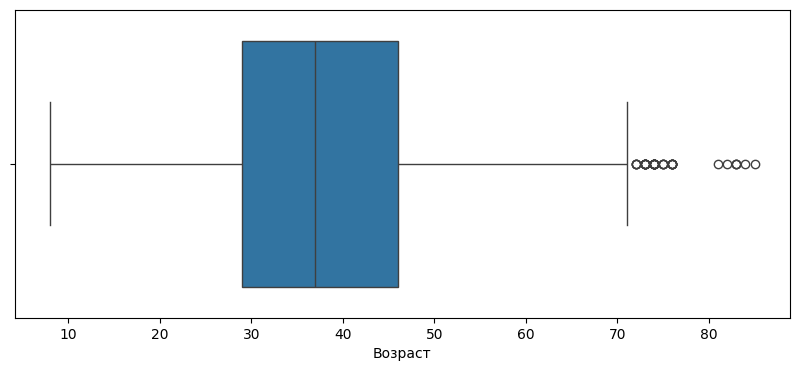

In [16]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = df['age'])
plt.xlabel('Возраст')

Из диаграммы видно, что значения больше 72 являются редкими, но все же реальными (пожилые люди вполне могут быть клиентами банка). А вот значения меньше 14 лет являются аномальными, ведь дети до 14 не могут пользоваться никакими банковскими услугами, поэтому удалим значения, меньшие 14.

In [17]:
df1 = df[df['age']>=14]

Text(0.5, 0, 'Возраст')

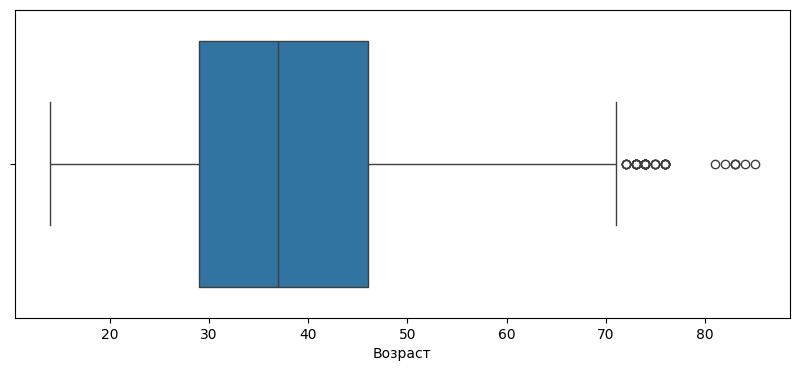

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = df1['age'])
plt.xlabel('Возраст')

### Столбец `child_amt`

Построим диаграмму размаха столбца `child_amt`

Text(0.5, 0, 'Количество детей')

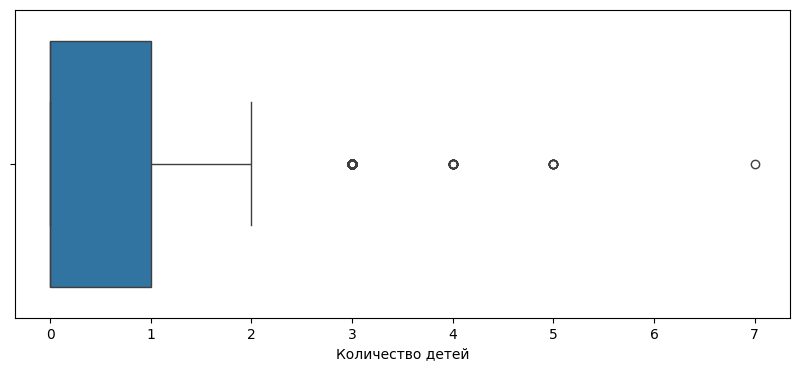

In [19]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = df1['child_amt'])
plt.xlabel('Количество детей')

Из диаграммы видно, что значения больше двух являются редкими, но все равно они вполне реальные и так как их не так много, то эти данные можно оставить для дальнейшего анализа

### Столбец `state_talk_time_sec`

Построим диаграмму размаха столбца `state_talk_time_sec`

Text(0.5, 0, 'Длительность звонка, сек.')

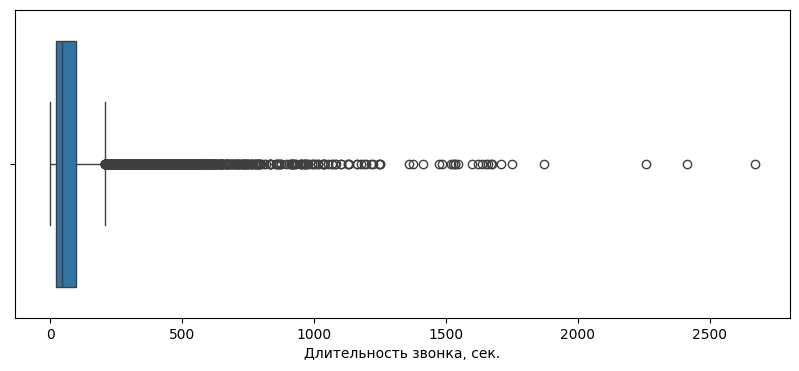

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = df1['state_talk_time_sec'])
plt.xlabel('Длительность звонка, сек.')

Из диаграммы видно, что длительность звонков варьируется от 0 до ~2700 секунд (около 45 минут). Хотя такие длительные звонки возможны (например, в рамках сложных кейсов: консультации, верификация, оформление заявки), они являются нетипичными для основной массы клиентов.
<br><br>
Так как их доля относительно невелика, но влияние на распределение значительное (сильно смещают масштаб и статистику), было принято решение ограничить длительность звонков значением 600 секунд (10 минут). Это позволяет сгладить выбросы и сохранить значимую часть информации.

In [21]:
df1 = df1[df1['state_talk_time_sec']<600]

Text(0.5, 0, 'Длительность звонка, сек.')

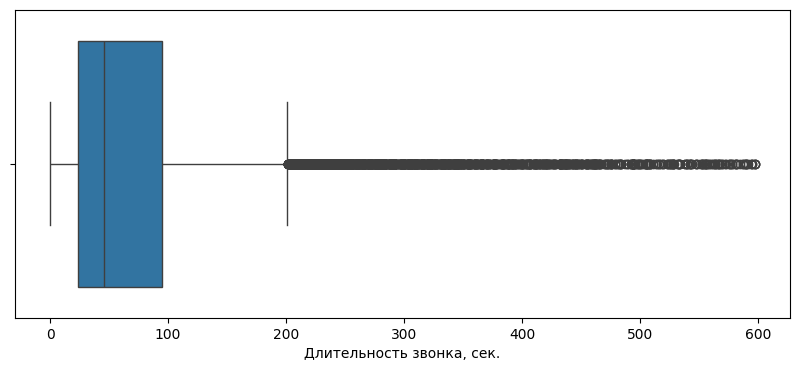

In [22]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = df1['state_talk_time_sec'])
plt.xlabel('Длительность звонка, сек.')

### Столбец `emp_work_month_cnt`

Построим диаграмму размаха столбца `emp_work_month_cnt`

Text(0.5, 0, 'Стаж сотрудника, мес.')

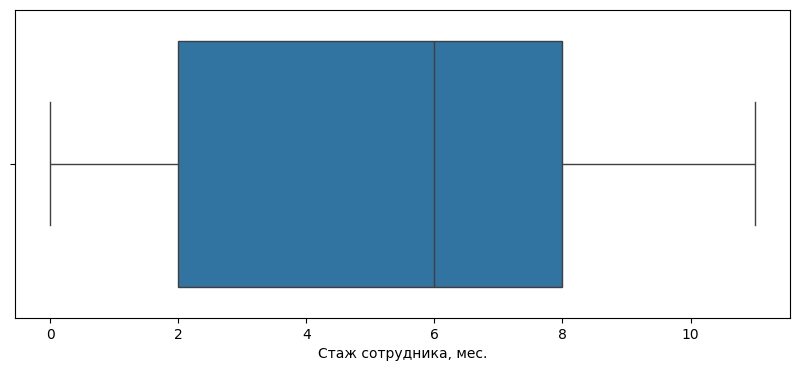

In [23]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = df1['emp_work_months_cnt'])
plt.xlabel('Стаж сотрудника, мес.')

Из диаграммы видно, что выбросы отсутствуют, поэтому править данные в данном случае нет необходимости.

### Столбец `emp_age`

Text(0.5, 0, 'Возраст сотрудника')

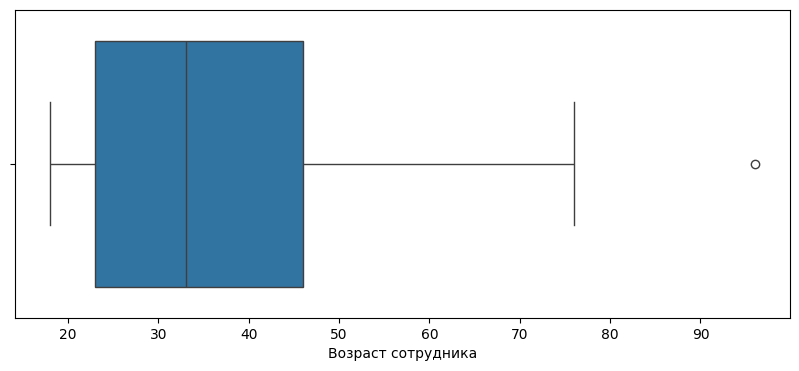

In [24]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = df1['emp_age'])
plt.xlabel('Возраст сотрудника')

На диаграмме виден один единственный выброс - сотрудник возрастом около 95 лет. Такое может быть, но очень маловероятно, поэтому лучше убрать это значение для дальнейшего анализа.

In [25]:
df1 = df1[df1['emp_age']<80]

Text(0.5, 0, 'Возраст сотрудника')

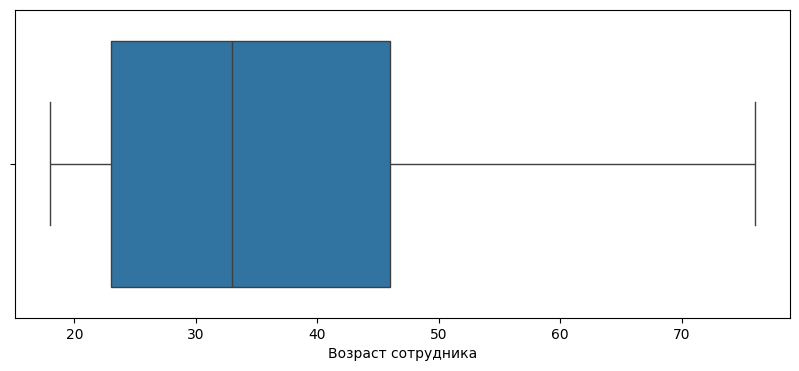

In [26]:
plt.figure(figsize=(10, 4))
sns.boxplot(x = df1['emp_age'])
plt.xlabel('Возраст сотрудника')

## 5. Анализ данных

### 5.1. Анализ тенденций в данных

#### Столбец `age`

Text(0, 0.5, 'Количество клиентов')

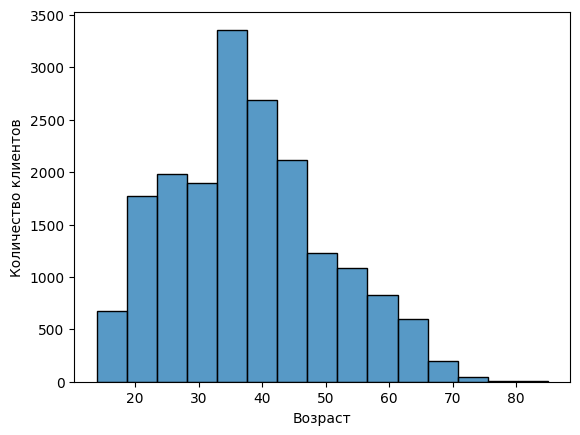

In [27]:
sns.histplot(data =df1, x = df1['age'], bins=15);
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')

Распределение возраста клиентов асимметрично, с пиковой активностью в диапазоне 30–40 лет. Основная масса сосредоточена между 20 и 50 годами, при этом старшие возрастные группы представлены значительно меньше.

#### Столбец `gender_cd`

Text(0, 0.5, 'Количество клиентов')

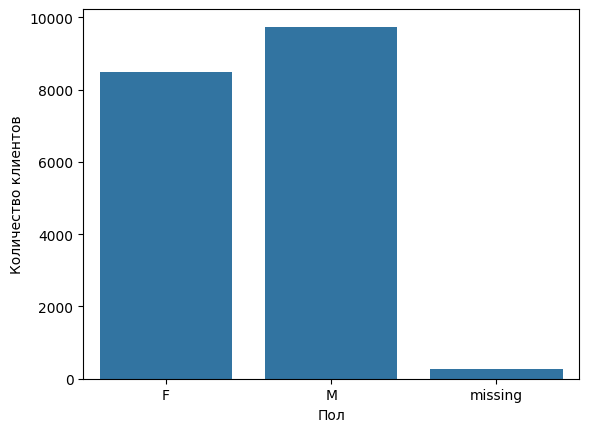

In [98]:
sns.countplot(data = df1, x = df1['gender_cd'])
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')

Распределение по полу умеренно сбалансировано: чуть больше мужчин (M), чем женщин (F). Доля пропущенных значений незначительна.

#### Столбец `region_size`

Text(0, 0.5, 'Количество клиентов')

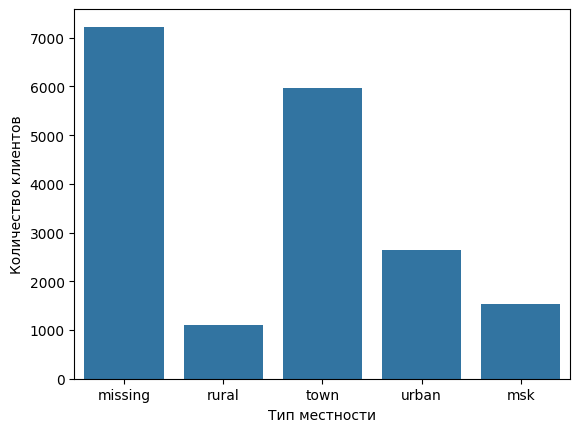

In [99]:
sns.countplot(data = df1, x=df1['region_size'])
plt.xlabel('Тип местности')
plt.ylabel('Количество клиентов')

Большая часть данных приходится на категорию "town", однако доля пропущенных значений (missing) также весьма значительна и может повлиять на дальнейший анализ.

#### Столбец `foreign_flg`

<Axes: xlabel='foreign_flg', ylabel='count'>

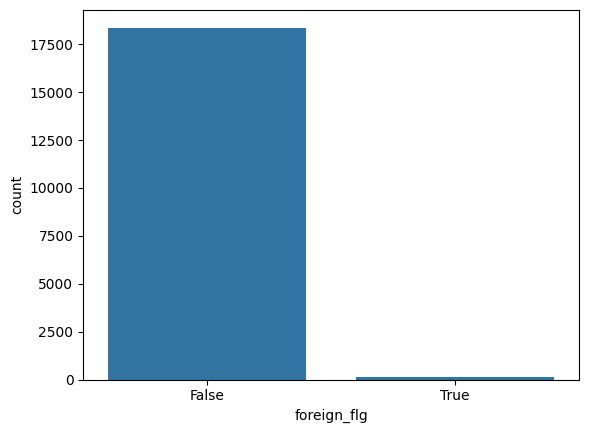

In [30]:
sns.countplot(data = df1, x=df1['foreign_flg'])

Большинство клиентов не являются иностранными (значение False), доля клиентов с признаком True крайне мала и вряд ли окажет существенное влияние на анализ..

#### Столбец `entrepreneur_flg`

<Axes: xlabel='entrepreneur_flg', ylabel='count'>

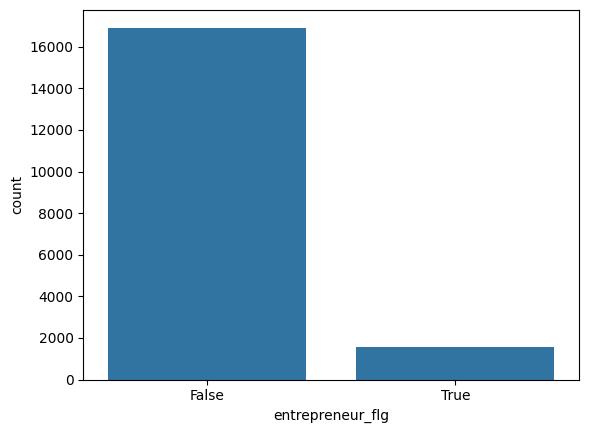

In [31]:
sns.countplot(data = df1, x=df1['entrepreneur_flg'])

Большинство клиентов не являются предпринимателями (False); предпринимателей в выборке заметно меньше, что может потребовать дополнительной стратификации при анализе.

#### Столбец `auto_flg`

<Axes: xlabel='auto_flg', ylabel='count'>

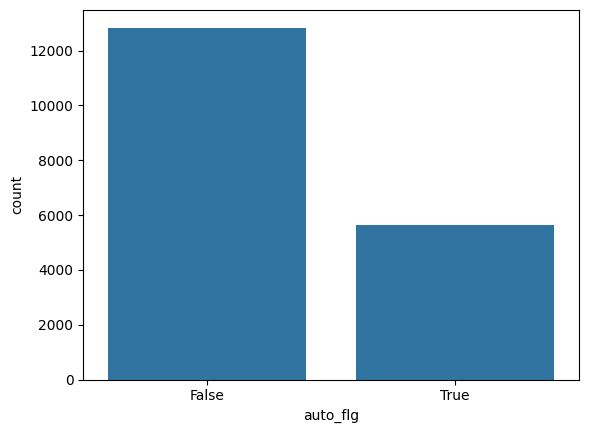

In [32]:
sns.countplot(data = df1, x=df1['auto_flg'])

Большая часть клиентов не владеет автомобилем (False), но доля автовладельцев (True) тоже значительна — около трети выборки.

#### Столбец `traveler_flg`

<Axes: xlabel='traveler_flg', ylabel='count'>

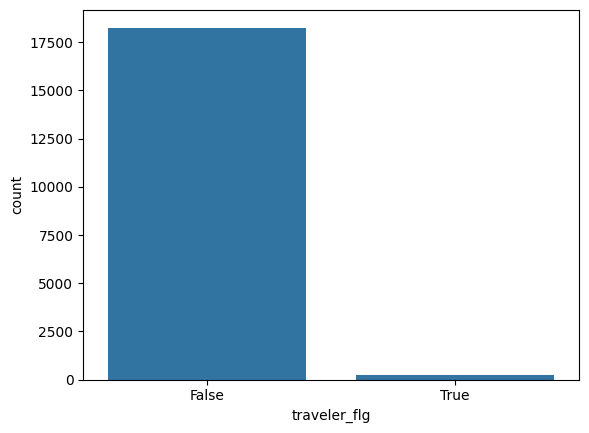

In [33]:
sns.countplot(data = df1, x=df1['traveler_flg'])

Путешествующих клиентов (True) в выборке крайне мало по сравнению с остальными — подавляющее большинство не имеет признака "traveler".

#### Столбец `partnership_flg`

<Axes: xlabel='partnership_flg', ylabel='count'>

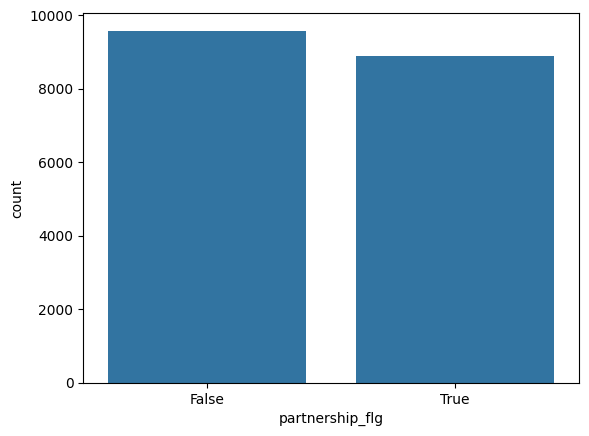

In [34]:
sns.countplot(data = df1, x=df1['partnership_flg'])

Признак участия в партнёрской программе (partnership_flg) распределён почти равномерно — доля клиентов с партнёрским флагом и без него сопоставима.

#### Столбец `child_amt`

<Axes: xlabel='child_amt', ylabel='count'>

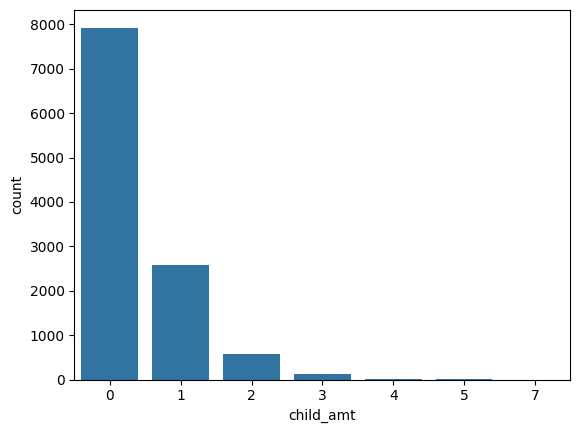

In [35]:
sns.countplot(data = df1, x=df1['child_amt'])

Большинство клиентов не имеют детей — доля таких записей значительно превышает остальные. С увеличением количества детей количество клиентов резко снижается.

#### Столбец `realty_type`

Text(0, 0.5, 'Количество клиентов')

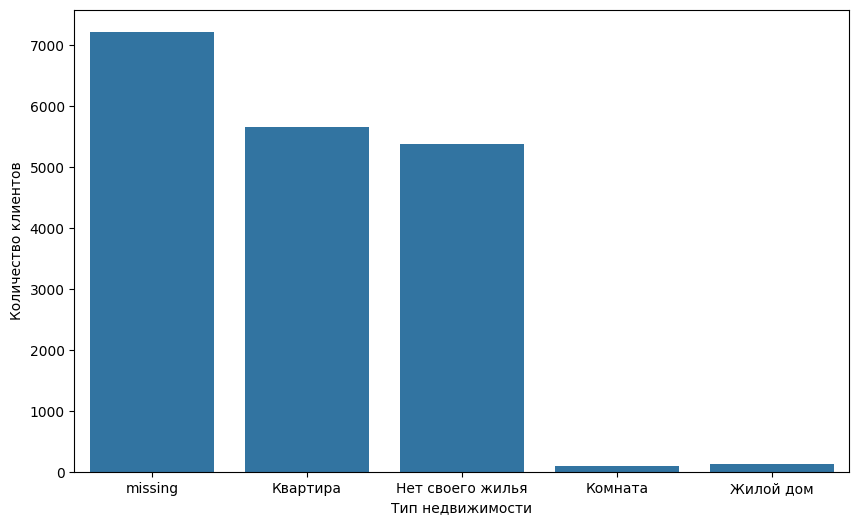

In [100]:
plt.figure(figsize=(10,6))
sns.countplot(data = df1, x=df1['realty_type'])
plt.xlabel('Тип недвижимости')
plt.ylabel('Количество клиентов')

Большинство записей в столбце realty_type приходится на категории «Квартира» и «Нет своего жилья». Также значительное количество значений отсутствует (missing). Остальные категории представлены существенно реже.

#### Столбец `product_cd`

Text(0, 0.5, 'Количество обращений')

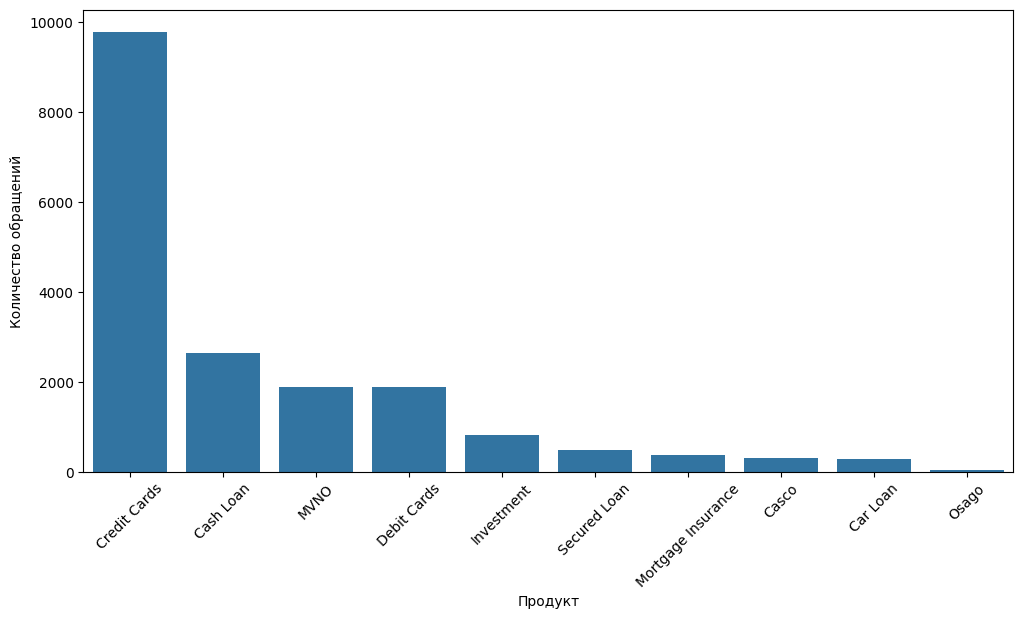

In [101]:

plt.figure(figsize=(12,6))

top_segments = df1['product_cd'].value_counts().nlargest(10).index


filtered_df = df1[df1['product_cd'].isin(top_segments)]
sns.countplot(data=filtered_df, x='product_cd', order=top_segments)
plt.xticks(rotation=45);
plt.xlabel('Продукт')
plt.ylabel('Количество обращений')

Большая часть обращений клиентов связана с продуктом Credit Cards — он заметно доминирует по числу записей. Значительно отстают Cash Loan, MVNO и Debit Cards, которые находятся в среднем диапазоне. Остальные продукты, включая Investment, Secured Loan и Osago, представлены слабо и составляют лишь небольшую долю от общего количества.

#### Столбец `functional_cd`

Text(0, 0.5, 'Количество обращений')

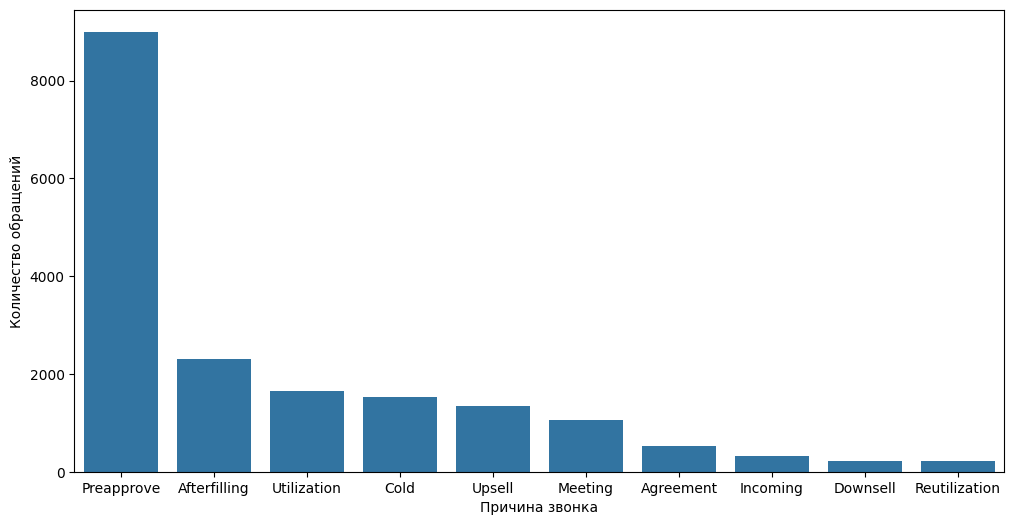

In [102]:
plt.figure(figsize=(12,6))

top_segments = df1['functional_cd'].value_counts().nlargest(10).index


filtered_df = df1[df1['functional_cd'].isin(top_segments)]
sns.countplot(data=filtered_df, x='functional_cd', order=top_segments)

plt.xlabel('Причина звонка')
plt.ylabel('Количество обращений')

Основная масса звонков приходится на сегмент Preapprove, который заметно опережает остальные категории. Далее с большим отрывом следуют Afterfilling, Utilization и Cold. Остальные функции — вроде Reutilization и Downsell — используются крайне редко. Это указывает на перекос в назначении звонков: фокус сделан на предодобренные предложения, тогда как другие цели контакта встречаются значительно реже.

#### Столбец `finish_dttm`

In [39]:
df1['year'] = df1['finish_dttm'].dt.to_period('Y')
df1['year']

0        2022
1        2023
2        2023
4        2023
5        2023
         ... 
18686    2023
18687    2024
18688    2024
18689    2022
18690    2024
Name: year, Length: 18477, dtype: period[Y-DEC]

<Axes: xlabel='year', ylabel='count'>

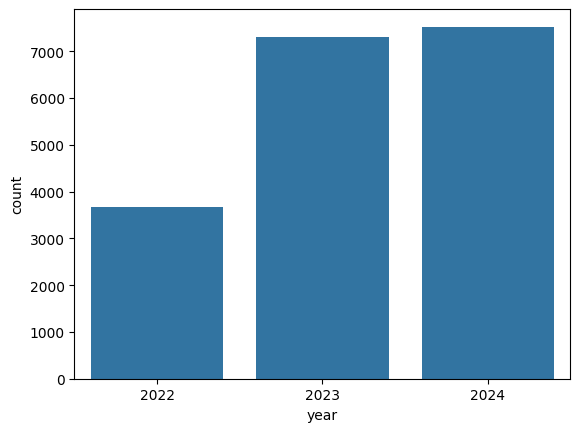

In [40]:
sns.countplot(data = df1, x = df1['year'])

Объём данных по годам показывает устойчивый рост: количество записей почти удвоилось с 2022 по 2023 год, а затем немного увеличилось в 2024. Это может отражать рост активности, масштабирование проекта или расширение базы клиентов.

In [41]:
df1['month'] = df1['finish_dttm'].dt.month
df1['month']

0         4
1        10
2         6
4         2
5        11
         ..
18686     5
18687     4
18688     4
18689     9
18690     6
Name: month, Length: 18477, dtype: int32

<Axes: xlabel='month', ylabel='count'>

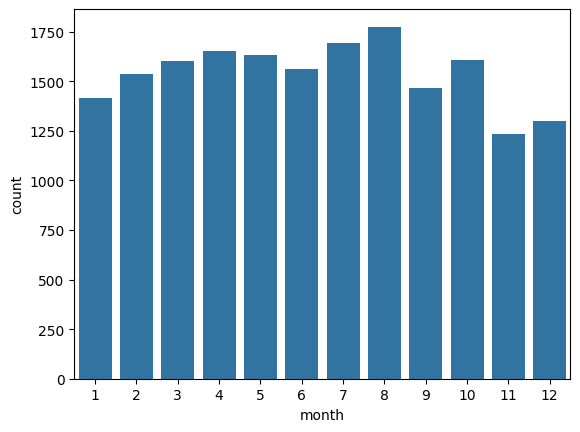

In [42]:
sns.countplot(data = df1, x = df1['month'])

Активность по месяцам относительно равномерна, но наблюдается пик в августе, а также заметное снижение в ноябре и декабре. Это может отражать сезонные колебания спроса или операционной нагрузки.

In [43]:
df1['weekday'] = df1['finish_dttm'].dt.weekday
df1['weekday']

0        1
1        2
2        4
4        0
5        4
        ..
18686    2
18687    4
18688    4
18689    3
18690    0
Name: weekday, Length: 18477, dtype: int32

<Axes: xlabel='weekday', ylabel='count'>

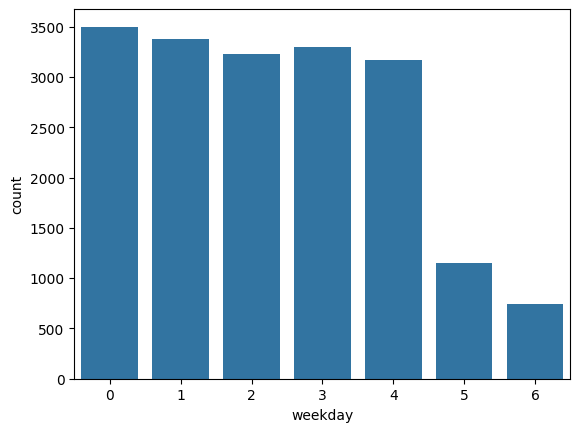

In [44]:
sns.countplot(data = df1, x = df1['weekday'])

Активность по дням недели сосредоточена в будни (0–4), при этом на выходных (5–6) наблюдается резкое падение — особенно по воскресеньям. Это логично, если учесть, что большинство звонков совершается в рабочие дни.

In [45]:
df1['year_month'] = df1['finish_dttm'].dt.to_period('M')
df1['year_month']

0        2022-04
1        2023-10
2        2023-06
4        2023-02
5        2023-11
          ...   
18686    2023-05
18687    2024-04
18688    2024-04
18689    2022-09
18690    2024-06
Name: year_month, Length: 18477, dtype: period[M]

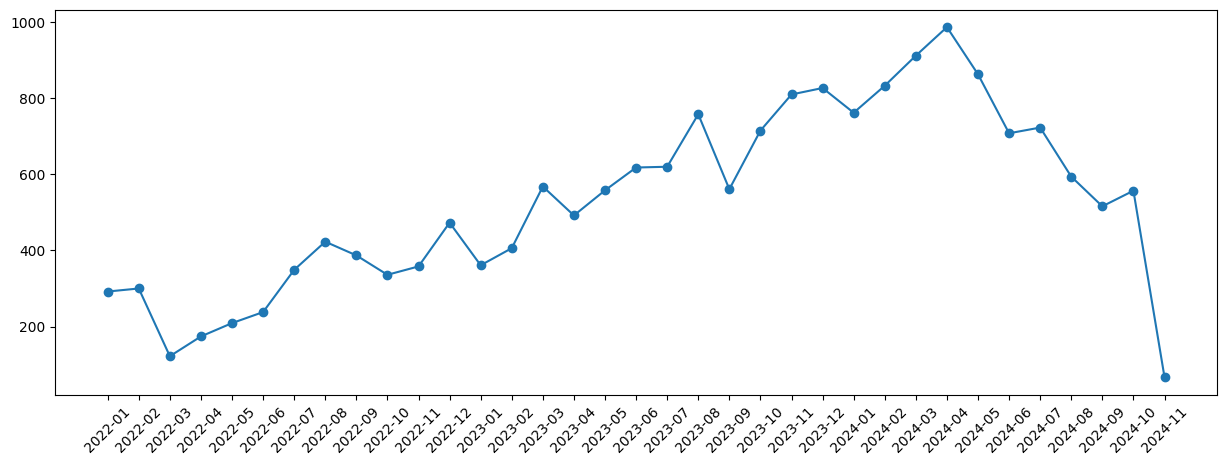

In [46]:

calls_per_month = df1.groupby('year_month').size()


plt.figure(figsize=(15, 5))
plt.plot(calls_per_month.index.astype(str), calls_per_month.values, marker='o')
plt.xticks(rotation = 45);

На графике видна чёткая тенденция роста количества звонков с начала 2022 года до весны 2024 года, с пиком в марте–апреле 2024. После этого объёмы начинают снижаться. Данные за октябрь–ноябрь 2024, вероятно, неполные, что объясняет резкий спад. В целом — типичная динамика для масштабируемой кампании с выходом на плато и последующим спадом.

In [47]:
df1['hour'] = df1['finish_dttm'].dt.hour


<Axes: xlabel='hour', ylabel='count'>

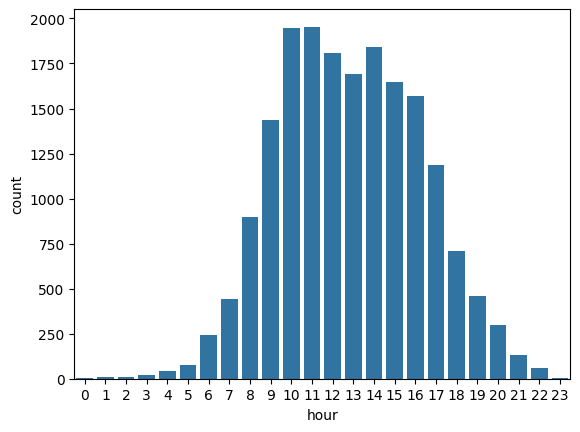

In [48]:
sns.countplot(data = df1, x = df1['hour'])

На графике видно, что звонки почти полностью отсутствуют ночью и ранним утром, а пик активности приходится на период с 10:00 до 14:00. После 17:00 объём звонков резко снижается. Похоже, все дружно обзванивают народ строго в рабочее время — это даже трогательно.

#### Столбец `state_talk_time_sec`

<Axes: xlabel='state_talk_time_sec', ylabel='Count'>

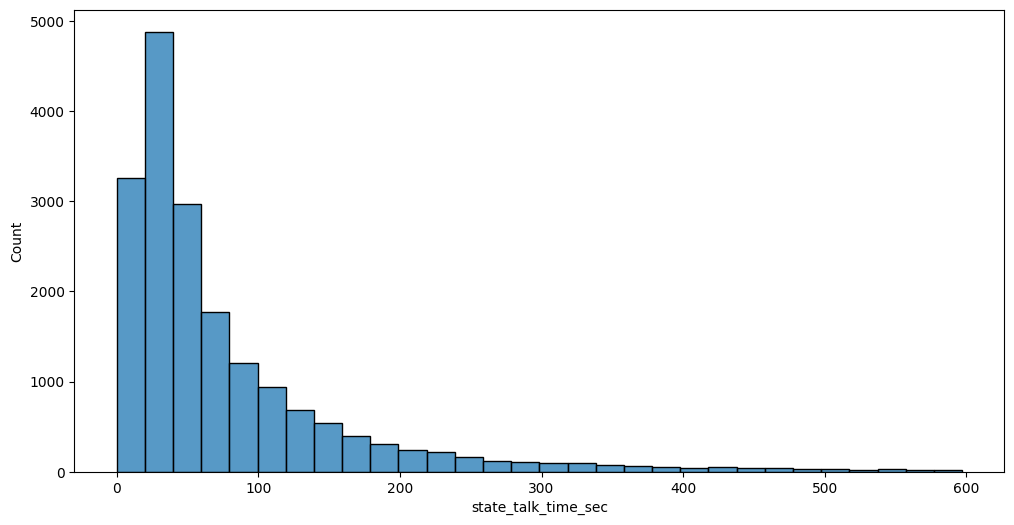

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(data = df1, x =df1['state_talk_time_sec'], bins = 30)

Распределение длительности звонков сильно скошено влево: подавляющее большинство разговоров длятся менее двух минут, причём пик приходится на 20–40 секунд. Дальше — как в любом разговоре с банком: чем дольше тянут, тем реже это происходит.

#### Столбец `wo_hit_status_result_desc`

<Axes: xlabel='wo_hit_status_result_desc', ylabel='count'>

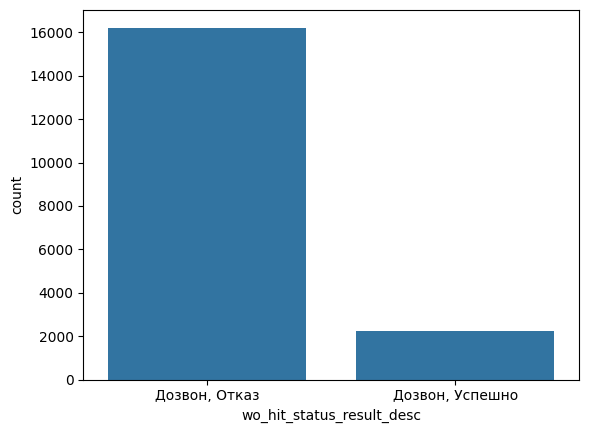

In [50]:
sns.countplot(data = df1, x = df1['wo_hit_status_result_desc'])

Большинство дозвонов заканчиваются отказом — успешных исходов в несколько раз меньше. Видимо, в контакт-центре либо предлагают кредитную карту с магическим шармом, либо просто всех достали.

#### Столбец `wo_hit_status_resoan_desc`

Text(0.5, 1.0, 'Топ 10 причин отказа')

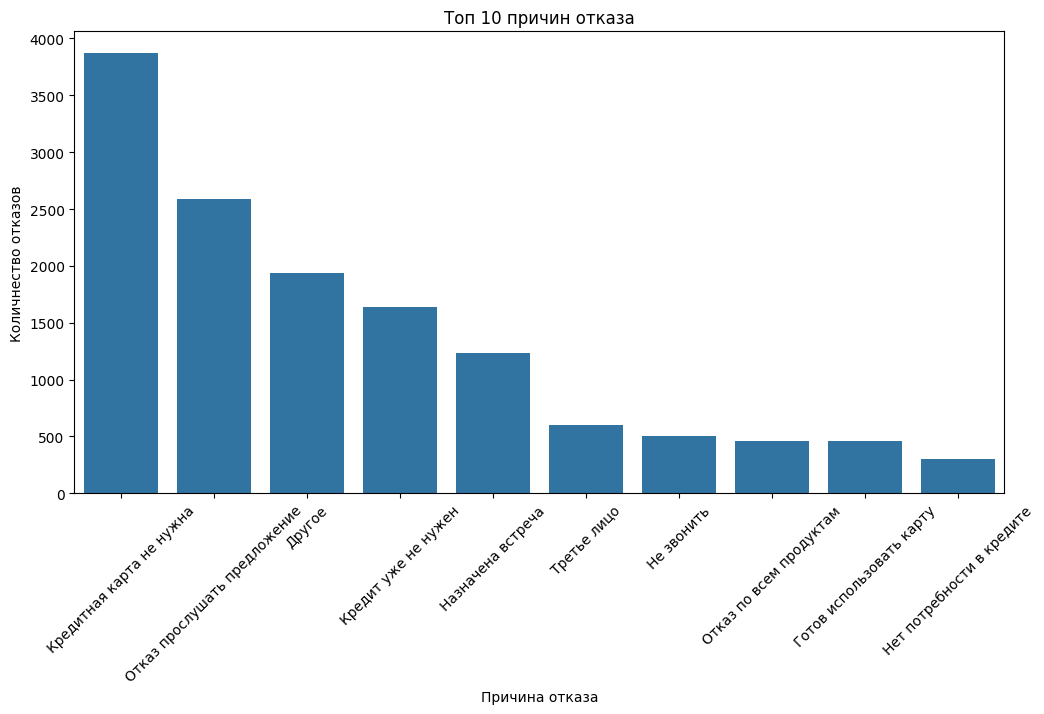

In [51]:
plt.figure(figsize=(12,6))

top_segments = df1['wo_hit_status_reason_desc'].value_counts().nlargest(10).index

filtered_df = df1[df1['wo_hit_status_reason_desc'].isin(top_segments)]
sns.countplot(data=filtered_df, x='wo_hit_status_reason_desc', order=top_segments)

plt.xticks(rotation = 45);
plt.xlabel('Причина отказа')
plt.ylabel('Количнество отказов')
plt.title('Топ 10 причин отказа')

Главные причины отказов — это «Кредитная карта не нужна» и «Отказ прослушать предложение». Видимо, большинство клиентов либо уверены, что карта — это пережиток прошлого, либо настолько не доверяют звонящим, что прерывают разговор на вдохе. Прекрасный пользовательский опыт, если вы — кнопка "положить трубку".

#### Столбец `emp_age`

In [52]:
df_emp = df1[['employee_id', 'emp_age', 'emp_gender_cd', 'emp_work_months_cnt']].drop_duplicates()
df_emp

,employee_id,emp_age,emp_gender_cd,emp_work_months_cnt
0,142052.0,30,W,1
1,7004.0,36,W,2
2,80760.0,52,W,6
4,14462.0,51,W,7
5,184241.0,43,W,6
...,...,...,...,...
17996,166827.0,23,M,2
18512,12399.0,47,W,7
18518,138780.0,35,missing,0
18575,183429.0,21,M,10


<Axes: xlabel='emp_age', ylabel='Count'>

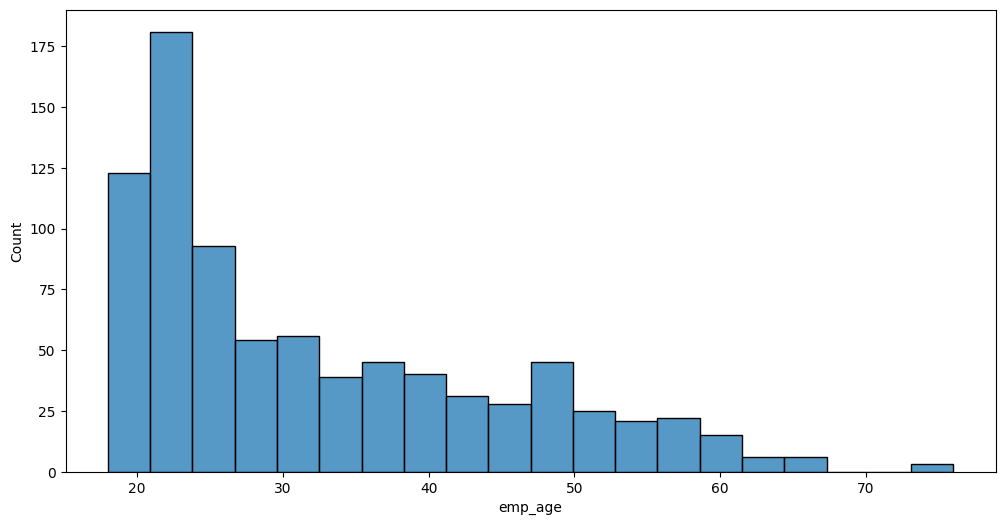

In [53]:
plt.figure(figsize=(12, 6))
sns.histplot(data = df_emp, x = df_emp['emp_age'], bins = 20)

На графике распределения переменной `emp_age` видно, что большинство сотрудников — молодые специалисты в возрасте от 20 до 30 лет. С возрастом количество сотрудников заметно снижается, особенно после 40 лет. Распределение имеет правосторонний перекос (скошено вправо), что указывает на преобладание молодых сотрудников в выборке.

#### Столбец `emp_gender_cd`

<Axes: xlabel='emp_gender_cd', ylabel='count'>

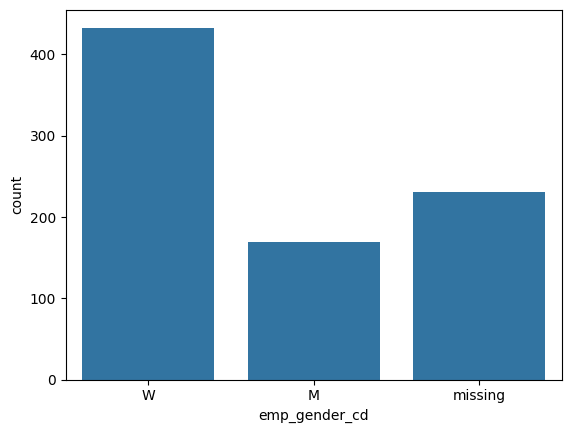

In [54]:
sns.countplot(data = df_emp, x = df_emp['emp_gender_cd'])

По распределению переменной `emp_gender_cd` видно следующее:

Женщины (W) составляют наибольшую долю сотрудников.

Мужчин (M) существенно меньше.

Также имеется значительное количество записей с отсутствующим значением пола (missing), что может потребовать дополнительной проверки или очистки данных.|

#### Столбец `emp_work_months_cnt`

<Axes: xlabel='emp_work_months_cnt', ylabel='count'>

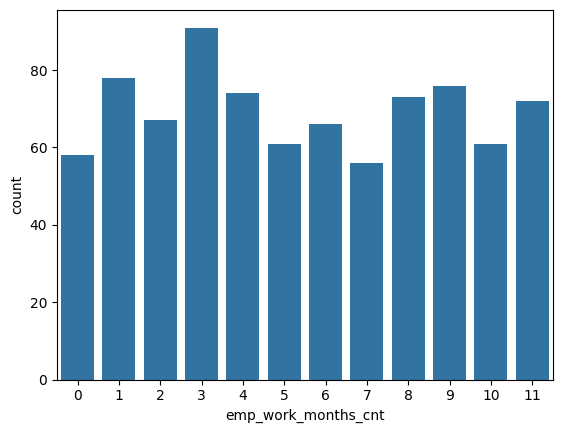

In [55]:
sns.countplot(data = df_emp, x = df_emp['emp_work_months_cnt'])

На графике распределения переменной `emp_work_months_cnt` видно:

Сотрудники с любым стажем от 0 до 11 месяцев представлены достаточно равномерно.

Пик приходится на 3 месяца работы — возможно, это точка завершения испытательного срока или этап оценки.

Доля сотрудников со стажем 0 месяцев также заметна, что может говорить о новой волне найма.



### 5.2. Оценка зависимости ключевых параметров от различных факторов, нахождение проблемных мест бизнеса и формулирование гипотез по их улучшению

#### <b>Оценка зависимости успеха звонка от различных факторов </b> 

Добавим флаг успеха для каждого звонка

In [56]:
df1['success_flg'] = df1['wo_hit_status_result_desc'].apply(lambda x: 1 if 'Успешно' in x else 0)

df1['fail_flg'] = df1['wo_hit_status_result_desc'].apply(lambda x: 1 if 'Отказ' in x else 0)

##### Зависимость успеха звонка от `age`

Проанализируем влияние возраста на успех звонка. Для этого разобьем пользователей на возрастные группы и оценим долю успешных звоков в каждой из них с помощью гистограммы.

Text(0.5, 1.0, 'Вклад возрастных групп в общий успех звонков')

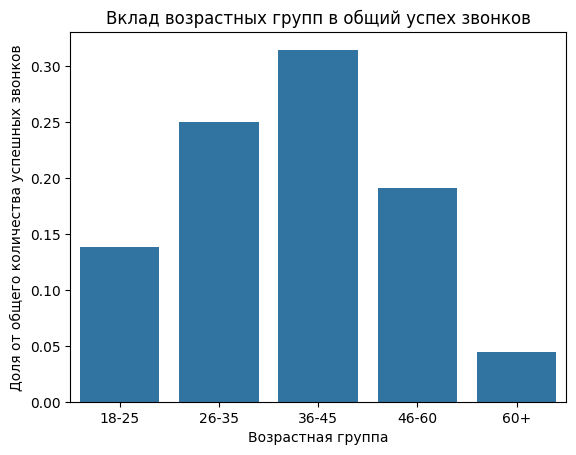

In [57]:
df1['age_group'] = pd.cut(
    df1['age'],
    bins=[18, 25, 35, 45, 60, 80],
    labels=['18-25', '26-35', '36-45', '46-60', '60+']
)


success_by_age_abs = df1.groupby('age_group', observed=False)['success_flg'].sum()


total_success = df1['success_flg'].sum()


success_share = success_by_age_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Возрастная группа')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад возрастных групп в общий успех звонков')

Возрастные группы 26–35 и 36–45 лет вносят наибольший вклад в общее число успешных звонков, что может свидетельствовать о наибольшей заинтересованности или финансовой активности клиентов этого возраста. Меньшая доля у групп 18–25 и 60+ может быть связана с недостаточной платёжеспособностью или сниженным интересом к банковским продуктам.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [58]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(df1['age_group'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 9.255267361181168
p-value: 0.05502626665575616


По результатам хи-квадрат-теста (statistics = 9.26, p-value = 0.055) можно сказать, что статистически значимой зависимости между возрастной группой клиента и успехом звонка не выявлено. Несмотря на визуальные различия, их нельзя считать подтверждёнными на уровне значимости 0.05.

##### Зависимость успеха звонка от `gender_cd`

Проанализируем влияние пола клиента на успешность звонка. Полученные результаты отобразим на гистограмме

Text(0.5, 1.0, 'Вклад пола клиентов в общий успех звонков')

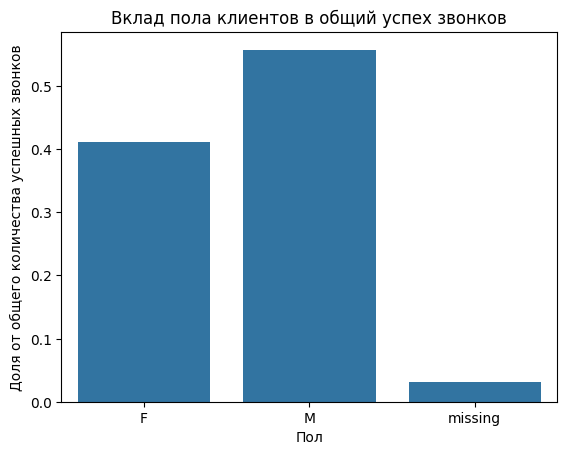

In [59]:
success_by_gender_abs = df1.groupby('gender_cd', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_gender_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Пол')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад пола клиентов в общий успех звонков')


Вклад клиентов мужского и женского пола в общий успех звонков распределён сравнительно равномерно, с небольшим преобладанием мужчин. Однако разница недостаточна, чтобы утверждать о влиянии пола на вероятность успеха звонка.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [60]:
contingency_table = pd.crosstab(df1['gender_cd'], df1['success_flg'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 71.04440537897523
p-value: 3.7402737293617186e-16


Проведён хи-квадрат тест независимости между полом клиента и успешностью звонка. Полученное значение p-value = 3.74e-16 позволяет отвергнуть нулевую гипотезу о независимости признаков. Таким образом, можно утверждать, что пол клиента статистически значимо влияет на вероятность успешного звонка.

##### Зависимость успеха звонка от `region_size`

Проанализируем влияние региона проживания клиента

Text(0.5, 1.0, 'Вклад регионов проживания в общий успех звонков')

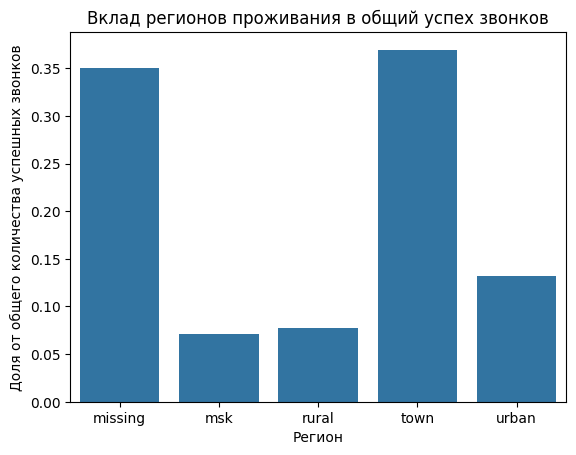

In [61]:
success_by_region_abs = df1.groupby('region_size', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_region_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Регион')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад регионов проживания в общий успех звонков')


Наибольший вклад в общее количество успешных звонков внесли клиенты из малых городов (town) и записи с отсутствующим указанием региона (missing). Клиенты из Москвы и сельской местности демонстрируют наименьший вклад. Это может быть связано с распределением выборки по регионам или с разницей в активности клиентов.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [62]:
df_no_missing = df1[df1['region_size'] != 'missing']

contingency_table = pd.crosstab(df_no_missing['region_size'], df_no_missing['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2 statistic:", chi2)
print("p-value:", p)

chi2 statistic: 28.337231551708385
p-value: 3.0856990483827593e-06


Гипотеза о независимости отвергнута: регион проживания статистически значимо влияет на вероятность успешного звонка (statistics = 28.3, p < 0.05)

##### Зависимость успеха звонка от `foreign_flg`

Проанализируем влияет ли на успех то, является ли клиент иностранцем

Text(0.5, 1.0, 'Вклад клиентов-иностранцев в общий успех звонков')

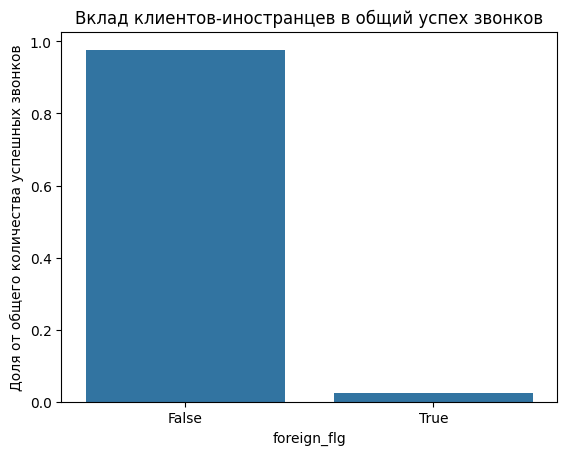

In [63]:
success_by_foreign_abs = df1.groupby('foreign_flg', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_foreign_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('foreign_flg')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад клиентов-иностранцев в общий успех звонков')


Несмотря на более высокую конверсию среди иностранцев, их вклад в общее число успешных звонков крайне мал — около 2%. Это указывает на то, что таких клиентов значительно меньше в выборке, и их поведение хоть и отличается, но практически не влияет на общую картину. 

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [64]:
contingency_table = pd.crosstab(df1['foreign_flg'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 116.91060388847956
p-value: 3.0030291952971106e-27


Результат хи-квадрат теста показывает крайне низкое значение p-value (3.0e-27), что указывает на статистически значимую связь между успешностью звонка и признаком foreign_flg. То есть, вероятность того, что такая разница возникла случайно — ничтожна. Это подтверждает вывод из графика: успешность звонков действительно зависит от того, является ли клиент иностранцем.

##### Зависимость успеха звонка от `entrepreneur_flg`

Проанализируем зависимость успеза звонка от того, является ли клиент предпринимателем или нет

Text(0.5, 1.0, 'Вклад предпринимателей в общий успех звонков')

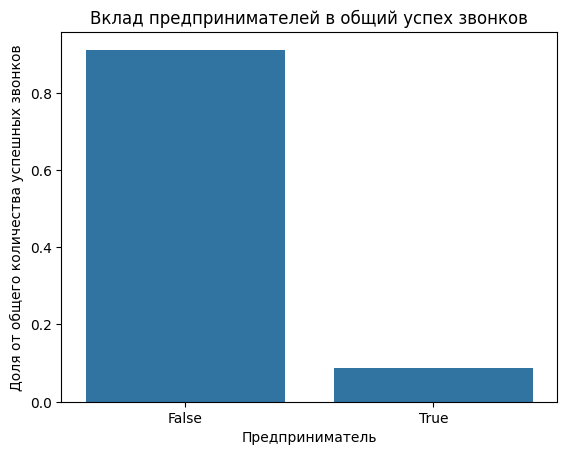

In [65]:
success_by_entrepreneur_abs = df1.groupby('entrepreneur_flg', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_entrepreneur_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Предприниматель')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад предпринимателей в общий успех звонков')

Вклад клиентов-предпринимателей в общее количество успешных звонков минимален по сравнению с остальными клиентами. Это может быть связано с их меньшей численностью в выборке или с тем, что их потребности хуже совпадают с предлагаемыми услугами.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [66]:
contingency_table = pd.crosstab(df1['entrepreneur_flg'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 0.535884069563207
p-value: 0.4641435250211121


Результаты теста хи-квадрат (p-value = 0.464) не позволяют отвергнуть нулевую гипотезу: статистически значимой связи между фактом предпринимательства и успешностью звонка не выявлено.

##### Зависимость успеха звонка от `auto_flg`

Проанализируем зависимость успеха звонка от наличия автомобиля у клиента 

Text(0.5, 1.0, 'Вклад клиентов с автомобилем в общий успех звонков')

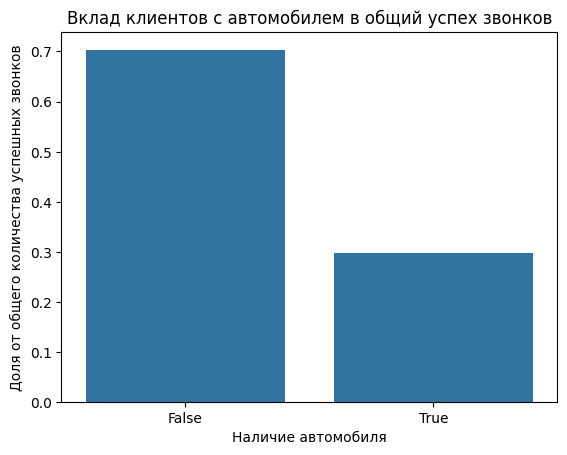

In [67]:
success_by_auto_abs = df1.groupby('auto_flg', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_auto_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Наличие автомобиля')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад клиентов с автомобилем в общий успех звонков')

На графике видно, что клиенты без автомобиля вносят более значительный вклад в общее количество успешных звонков. Это может быть связано с тем, что у них выше мотивация к оформлению услуг, например, связанных с транспортом, кредитами или страхованием. Однако сам по себе этот факт не говорит о наличии прямой зависимости между наличием автомобиля и успешностью звонка.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [68]:
ontingency_table = pd.crosstab(df1['auto_flg'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistics:", chi2)
print("p-value:", p)

statistics: 0.535884069563207
p-value: 0.4641435250211121


Результаты хи-квадрат теста (p-value = 0.464) показывают, что статистически значимой зависимости между наличием автомобиля и успехом звонка нет.
Таким образом, наличие автомобиля у клиента не влияет на конверсию.

##### Зависимость успеха звонка от `traveler_flg`

Проанализируем, влияет ли на долю успешных звонков тот факт, путешествует клиент или нет

Text(0.5, 1.0, 'Вклад клиентов с флагом путешественника в общий успех звонков')

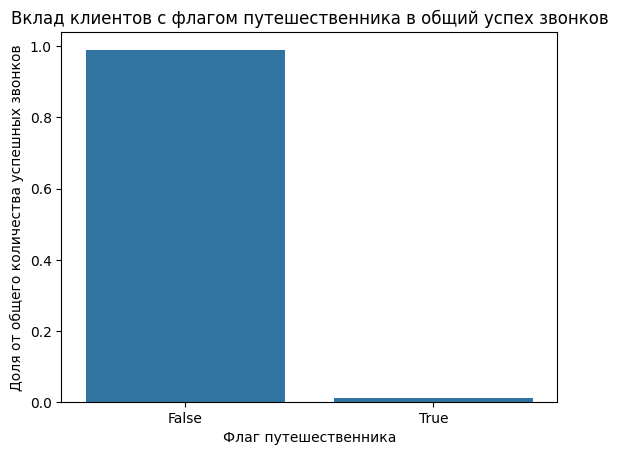

In [69]:
success_by_traveler_abs = df1.groupby('traveler_flg', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_traveler_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Флаг путешественника')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад клиентов с флагом путешественника в общий успех звонков')

Клиенты с флагом путешественника формируют крайне незначительную долю всех успешных звонков. Это может указывать либо на низкую представленность данной категории в выборке, либо на объективные трудности в достижении успеха при звонках этим клиентам — например, из-за их меньшей доступности.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [70]:
contingency_table = pd.crosstab(df1['traveler_flg'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 1.0089491853910268
p-value: 0.31515471332447237


Вывод: несмотря на визуально заметную разницу между группами, тест хи-квадрат не выявил статистически значимой связи между флагом путешественника и успехом звонка (p-value = 0.315 > 0.05). Следовательно, наличие данного признака нельзя считать значимым фактором.

##### Зависимость успеха звонка от `partnership_flg`

Проанализируем, влияет ли наличие партнера на долю успешных звонков

Text(0.5, 1.0, 'Вклад клиентов с флагом партнёрства в общий успех звонков')

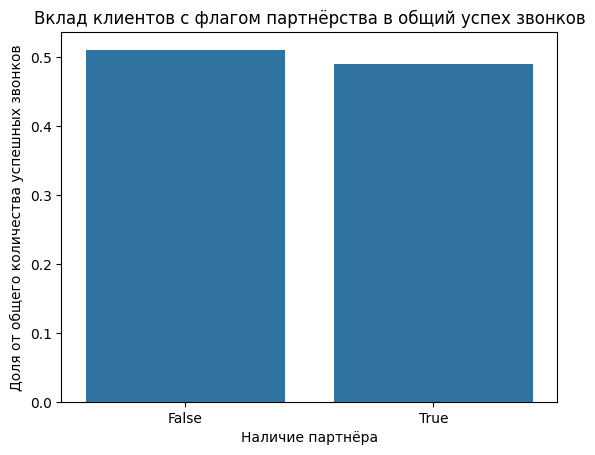

In [71]:
success_by_partnership_abs = df1.groupby('partnership_flg', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_partnership_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Наличие партнёра')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад клиентов с флагом партнёрства в общий успех звонков')

Различия во вкладе успешных звонков между клиентами с флагом партнерства и без него минимальны, оба сегмента вносят примерно равный вклад в общий успех. Это может указывать на то, что наличие партнёра не оказывает существенного влияния на эффективность звонков.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [72]:
contingency_table = pd.crosstab(df1['partnership_flg'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic:

 0.6022912288903665
p-value: 0.4377051514140984


Различие между группами с партнёрским флагом и без него не является статистически значимым (p-value = 0.437>0.05). Это значит, что наличие партнёра никак не влияет на успех звонка, по крайней мере, согласно твоим данным. Возможно, твоя модель просто слишком заземлённая для романтики.

##### Зависимость успеха звонка от `child_amt`

Проанализируем зависимость уcпеха звонка от количества детей клиента

Text(0.5, 1.0, 'Вклад количества детей в общий успех звонков')

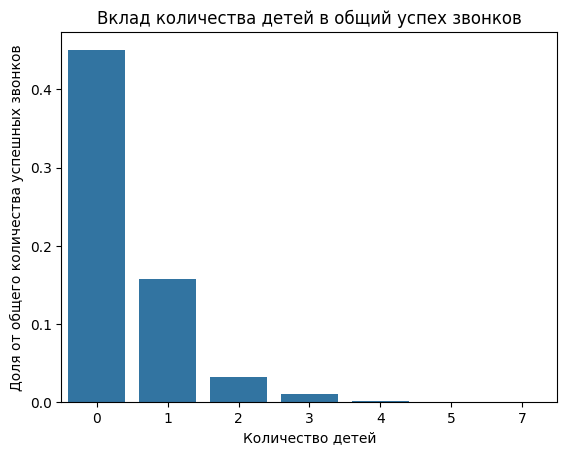

In [73]:
success_by_child_amt_abs = df1.groupby('child_amt', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_child_amt_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Количество детей')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад количества детей в общий успех звонков')

На графике видно, что основная доля успешных звонков приходится на клиентов без детей. С увеличением количества детей вклад в общий успех резко снижается. Это может быть связано с меньшей вовлечённостью, занятостью или другими социальными факторами, ограничивающими возможность взаимодействия с продуктом.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [74]:
contingency_table = pd.crosstab(df1['child_amt'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 4.099454279061596
p-value: 0.6632194822591919


По результатам хи-квадрат теста (χ² = 4.10, p-value = 0.663) нет статистически значимой зависимости между количеством детей и успешностью звонка. Полученные ранее различия в доле успеха, вероятнее всего, случайны и не отражают устойчивой связи.

##### Зависимость успеха звонка от `realty_type`

Проанализируем как влияет тип основной недвижимости на успех звонка 

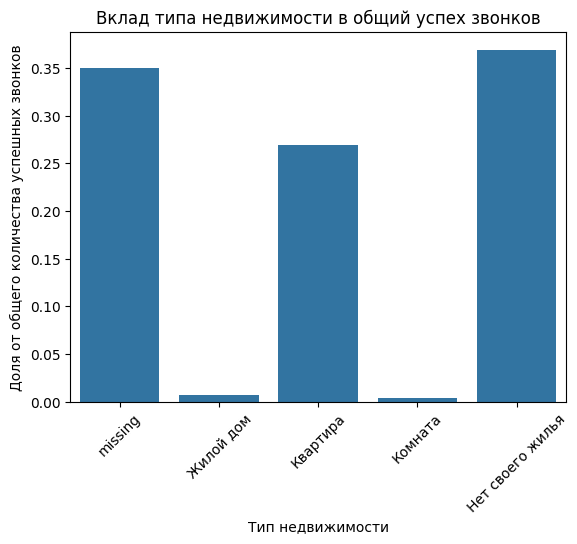

In [75]:
success_by_realty_abs = df1.groupby('realty_type', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_realty_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Тип недвижимости')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад типа недвижимости в общий успех звонков')
plt.xticks(rotation=45);

Наибольший вклад в общее количество успешных звонков вносят клиенты без собственного жилья и с отсутствующей информацией о недвижимости. Это может говорить о том, что отсутствие жилья связано с более высокой потребностью в финансовых услугах. Вклад остальных категорий недвижимости значительно ниже, особенно клиентов с жилым домом и комнатой, что может указывать на меньшую заинтересованность в кредитных продуктах у более обеспеченных групп.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [76]:
df_no_missing = df1[df1['realty_type'] != 'missing']

contingency_table = pd.crosstab(df_no_missing['realty_type'], df_no_missing['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2 statistic:", chi2)
print("p-value:", p)

chi2 statistic: 55.06371650137267
p-value: 6.6545916914640005e-12


Вывод: тип недвижимости статистически значимо влияет на вероятность успешного звонка (p < 0.05). Наибольший вклад в успешные звонки вносят клиенты без жилья и с отсутствующей информацией, что, возможно, связано с повышенной потребностью в финансовых услугах. Вклад клиентов с жильём минимален, что может указывать на их меньшую заинтересованность в подобных продуктах.

##### Зависимость успеха звонка от `product_cd`

Проанализируем влияние продукта, по поводу которого совершается звонок, на успех звонка

Text(0.5, 1.0, 'Вклад продуктов в общий успех звонков')

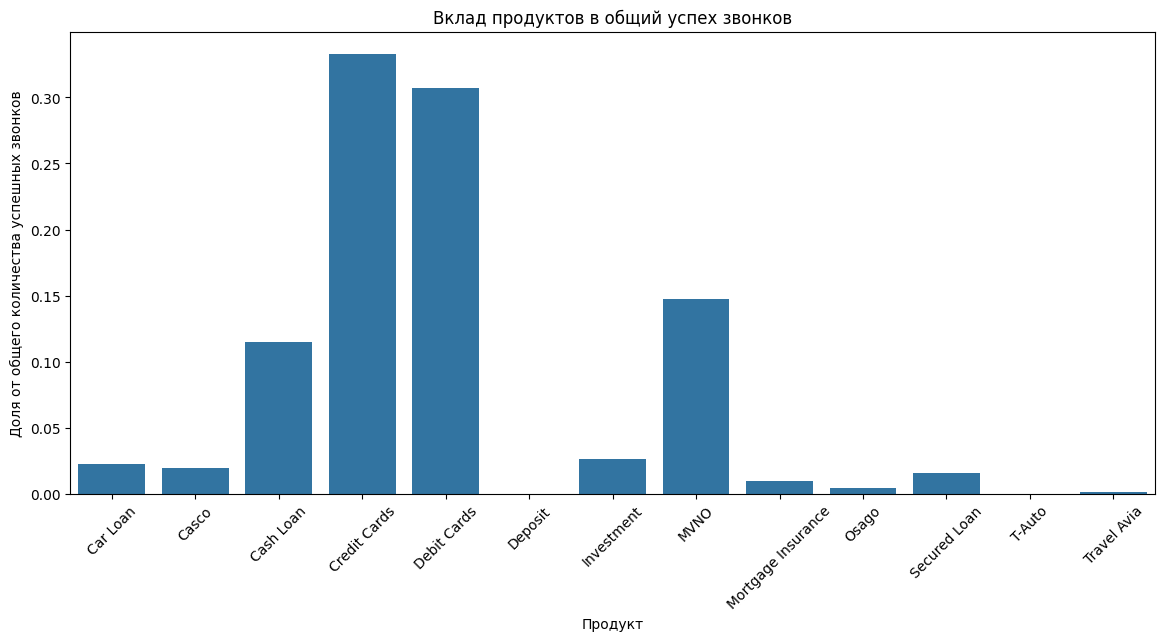

In [77]:
success_by_product_abs = df1.groupby('product_cd', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_product_abs / total_success

plt.figure(figsize=(14, 6))
sns.barplot(x=success_share.index, y=success_share.values)
plt.xticks(rotation=45)
plt.xlabel('Продукт')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад продуктов в общий успех звонков')


Наибольший вклад в общее количество успешных звонков дают продукты Credit Cards и Debit Cards — на них приходится более половины всех успешных контактов. Это может быть связано с широкой распространённостью этих продуктов и их высокой актуальностью для клиентов. Прочие категории, включая Travel Avia, Secured Loan и Osago, дают минимальный вклад, что, вероятно, указывает либо на меньшую релевантность этих услуг, либо на ограниченную аудиторию, к которой они адресованы.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [78]:
contingency_table = pd.crosstab(df1['product_cd'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 1393.4596619108115
p-value: 3.5755528013842554e-291


Хи-квадрат тест показал, что различия в успешности звонков между продуктами статистически значимы (p-value < 0.05).
Таким образом, продукт, по которому совершается звонок, оказывает влияние на вероятность успеха.

##### Зависимость успеха звонка от `hour`

Проанализируем зависимость успеха звонка от времени, в которое он совершается

Text(0.5, 1.0, 'Вклад времени звонка в общий успех звонков')

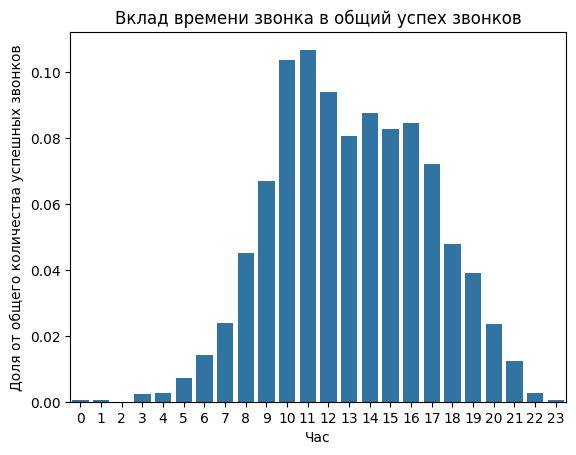

In [79]:
success_by_hour_abs = df1.groupby('hour', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_hour_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Час')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад времени звонка в общий успех звонков')

Наибольший вклад в общее количество успешных звонков приходится на промежуток с 10 до 13 часов. Это может говорить о том, что именно в это время клиенты наиболее доступны и лояльны к коммуникации. Наименьший вклад — в ночное и позднее вечернее время, когда, видимо, никто не хочет слушать про «выгодное предложение».

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [80]:
contingency_table = pd.crosstab(df1['hour'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 72.03184557139153
p-value: 5.882057537855703e-07


Зависимость между временем звонка и успешностью действительно есть, и это не просто совпадение — хи-квадрат тест показал p-value = 5.88e-07, что значительно меньше порога значимости 0.05.
Вывод: можно уверенно утверждать, что успех звонка зависит от времени его совершения. Особенно заметно, что звонки, совершённые ближе к середине дня (где-то с 10 до 16), вносят наибольший вклад в общую успешность. 

##### Зависимость успеха звонка от `functional_cd`

Text(0.5, 1.0, 'Вклад причин в общий успех звонков')

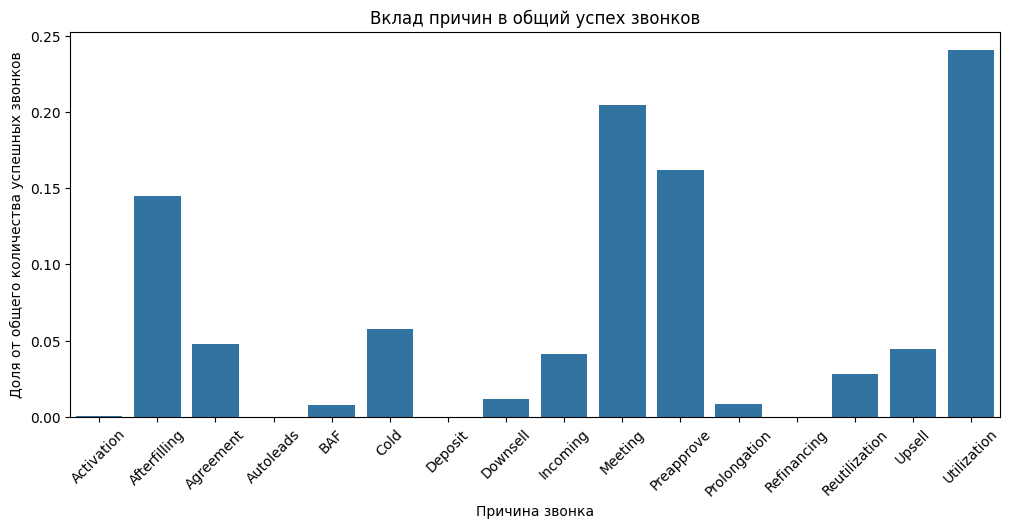

In [81]:
success_by_functional_abs = df1.groupby('functional_cd', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_functional_abs / total_success

plt.figure(figsize=(12, 5))
sns.barplot(x=success_share.index, y=success_share.values)
plt.xticks(rotation=45)
plt.xlabel('Причина звонка')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад причин в общий успех звонков')

Наибольший вклад в общее количество успешных звонков вносят коды Utilization, Meeting и Preapprove, что может указывать на высокую заинтересованность клиентов по этим направлениям. В то же время коды вроде Deposit, Autoleads, Prolongation и Activation практически не фигурируют в успешных контактах, что, вероятно, говорит о слабом отклике или нерелевантности этих тем при текущем подходе.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [82]:
contingency_table = pd.crosstab(df1['functional_cd'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 2464.450373387339
p-value: 0.0


Хи-квадрат = 2464.45, p-value = 0.0 — это значит, что различия между причинами звонка по доле успешных звонков статистически значимы с огромным запасом.

Вывод:
Причина звонка оказывает существенное влияние на успех звонка. Некоторые причины, например, связанные с "Utilization", "Meeting" и "Prolongation", демонстрируют более высокие показатели успеха, в то время как другие — сильно отстают. Это может быть связано с различиями в целях звонка и мотивации клиентов по отношению к разным операциям.

##### Зависимость успеха звонка от `segment_cd`

Проанализируем зависимость доли успешных звонков от сегмента человека

Text(0.5, 1.0, 'Вклад сегментов в общий успех звонков')

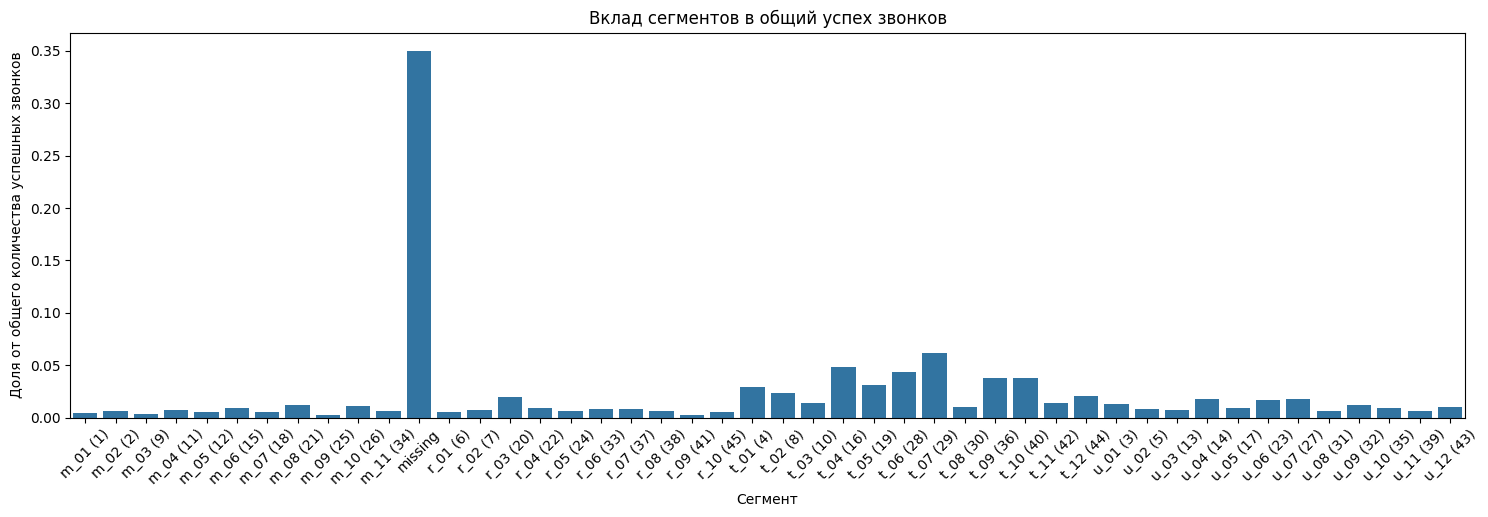

In [83]:
success_by_segment_abs = df1.groupby('segment_cd', observed=False)['success_flg'].sum()
total_success = df1['success_flg'].sum()
success_share = success_by_segment_abs / total_success

plt.figure(figsize=(18, 5))
sns.barplot(x=success_share.index, y=success_share.values)
plt.xticks(rotation=45)
plt.xlabel('Сегмент')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад сегментов в общий успех звонков')

Сегмент с отсутствующим значением (missing) демонстрирует наибольший вклад в общее число успешных звонков. Это связано с неполнотой данных.

Среди остальных сегментов наблюдается относительно равномерное распределение. Однако, так как по условию код сегмента записываются в виде "a_xx (y)", где хх обратно коррелирует с доходом клиента, отсюда можно сделать вывод, что клиенты с самым высоким доходом имеют наименьшую долю успешных звонков, что может указывать на меньшую заинтересованность состоятельных клиентов в предлагаемых услугах или же на их более высокие требования к качеству продукта и способу взаимодействия.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05 <br>
Однако "missing" может исказить резульаты анализа, поэтому тест будет проводиться без этих значений

In [84]:

df_no_missing = df1[df1['segment_cd'] != 'missing']

contingency_table = pd.crosstab(df_no_missing['segment_cd'], df_no_missing['success_flg'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("P-value:", p)

statistic: 112.00649791023
P-value: 7.577616754167905e-08


При исключении сегмента с отсутствующими значениями (missing) результат хи-квадрат теста остаётся статистически значимым (statistic = 112.01, p-value ≈ 7.58e-08). Это говорит о том, что различия в доле успешных звонков между сегментами не случайны, даже без учёта аномального влияния пропущенных данных.

##### Зависимость успеха звонка от `emp_age`

Проанализируем зависимость успеха звонка от возраста сотрудника 

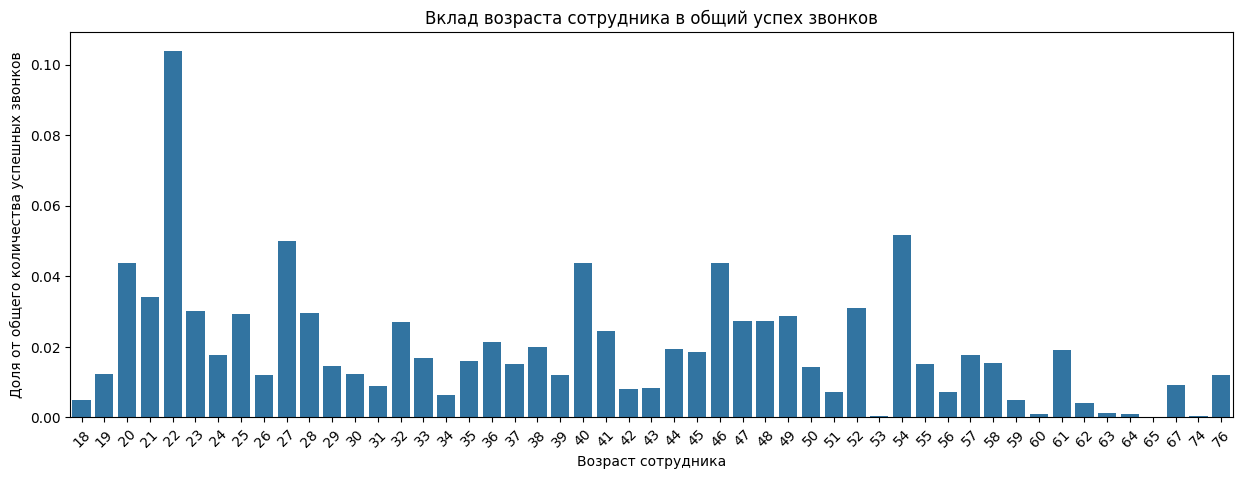

In [85]:

success_by_emp_age_abs = df1.groupby('emp_age', observed=False)['success_flg'].sum()


total_success = df1['success_flg'].sum()


success_share = success_by_emp_age_abs / total_success


plt.figure(figsize=(15, 5))
sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Возраст сотрудника')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад возраста сотрудника в общий успех звонков')
plt.xticks(rotation=45);

Анализ распределения успешных звонков по возрасту сотрудников показал, что наибольший вклад в общее число успешных коммуникаций вносят сотрудники в возрасте от 20 до 30 лет, с выраженным пиком на возрасте 22 года. Это может свидетельствовать о высокой активности и вовлечённости сотрудников данной возрастной категории в операционные процессы.

После 30 лет наблюдается общее снижение доли успешных звонков, что может быть связано с перераспределением функциональных обязанностей, снижением количества сотрудников в старших возрастных группах, либо снижением вовлеченности в исходящие коммуникации.

Небольшие локальные повышения наблюдаются в возрасте около 41, 46 и 53 лет, что может быть следствием специфики отдельных сегментов персонала или организационных ролей.

Сотрудники в возрасте старше 60 лет вносят минимальный вклад в общую успешность звонков, что, вероятно, обусловлено их малым числом в выборке или ограниченной операционной активностью.

Таким образом, наибольшая операционная эффективность в контексте успешных звонков наблюдается среди младших возрастных групп, что может быть учтено при формировании и управлении командами взаимодействия с клиентами.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [86]:
contingency_table = pd.crosstab(df1['emp_age'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 898.337265378604
p-value: 6.568294582205563e-156


Наблюдается статистически значимая связь между возрастом сотрудника и вероятностью успешного звонка (p < 0.05). Вероятность того, что полученное распределение является результатом случайных колебаний мала

##### Зависимость успеха звонка от `emp_gender_cd`

Проанализируем зависимость успеха звонка от пола работника 

Text(0.5, 1.0, 'Вклад пола сотрудника в общий успех звонков')

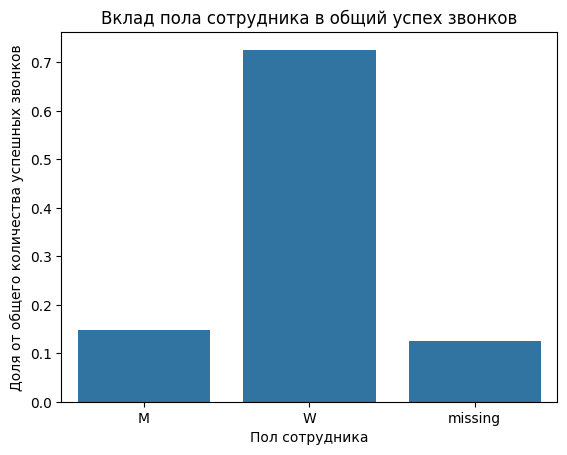

In [87]:
success_by_gender_abs = df1.groupby('emp_gender_cd', observed=False)['success_flg'].sum()


total_success = df1['success_flg'].sum()


success_share = success_by_gender_abs / total_success


sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Пол сотрудника')
plt.ylabel('Доля от общего количества успешных звонков')
plt.title('Вклад пола сотрудника в общий успех звонков')

По результатам анализа удалось выявить следующие тенденции:
- Женщины (W) вносят наибольший вклад в общее количество успешных звонков — более 70%.
- Мужчины (M) обеспечивают значительно меньшую долю успехов — порядка 15%.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [88]:
contingency_table = pd.crosstab(df1['emp_gender_cd'], df1['success_flg'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 4.149852183235735
p-value: 0.1255657075085508


При уровне значимости α = 0.05, p-value значительно выше порогового значения, следовательно, мы не имеем оснований отклонить нулевую гипотезу. Это значит, что различия в доле успешных звонков между категориями пола не являются статистически значимыми.

##### Зависимость успеха звонка от `emp_work_months_cnt`

Проанализируем влияние стажа работника на успех звонка 

Text(0.5, 1.0, 'Вклад стажа сотрудника в общий успех звонков')

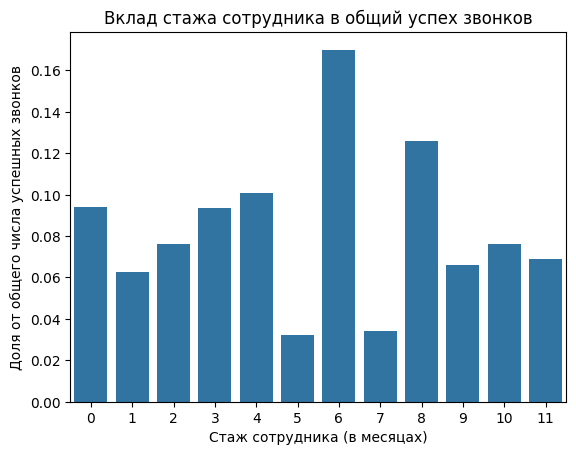

In [89]:
success_by_emp_work_months_abs = df1.groupby('emp_work_months_cnt', observed=False)['success_flg'].sum()


total_success = df1['success_flg'].sum()


success_share = success_by_emp_work_months_abs / total_success

sns.barplot(x=success_share.index, y=success_share.values)
plt.xlabel('Стаж сотрудника (в месяцах)')
plt.ylabel('Доля от общего числа успешных звонков')
plt.title('Вклад стажа сотрудника в общий успех звонков')

- Сотрудники со стажем 6 месяцев вносят наибольший вклад в общее число успешных звонков (более 16%).
Это может свидетельствовать о накопленном опыте, но ещё не наступившем профессиональном выгорании.

- Также заметны относительно высокие значения для 0, 3–4 и 8 месяцев, что может говорить об эффективной адаптации в первые месяцы и «втором дыхании» ближе к концу года.

- Стаж в 5 и 7 месяцев демонстрирует наименьший вклад. Возможно, в это время часть сотрудников увольняется или теряет мотивацию.

Проведем тест хи-квадрат с кровнем значимости alpha = 0.05

In [90]:
contingency_table = pd.crosstab(df1['emp_work_months_cnt'], df1['success_flg'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("statistic:", chi2)
print("p-value:", p)

statistic: 286.4011106071211
p-value: 6.389249154945475e-55


Наблюдается статистически значимая зависимость между стажем сотрудника (в месяцах) и успешностью звонка. То есть, распределение успешных звонков не является случайным по уровням стажа.

#### <b>Оценка зависимости наиболее частых причин неудачных звонков от различных факторов</b>

Дальнейший анализ направлен на поиск слабых и проблемных мест системы, а также формирование и приоритизация гипотез по их улучшению.<br>
Для поиска проблемных моментов необходимо проанализировать один из главных показателей: успех/неуспех звонка. Нужно оценить, какие причины наиболее часто встречаются в неуспешных звонках

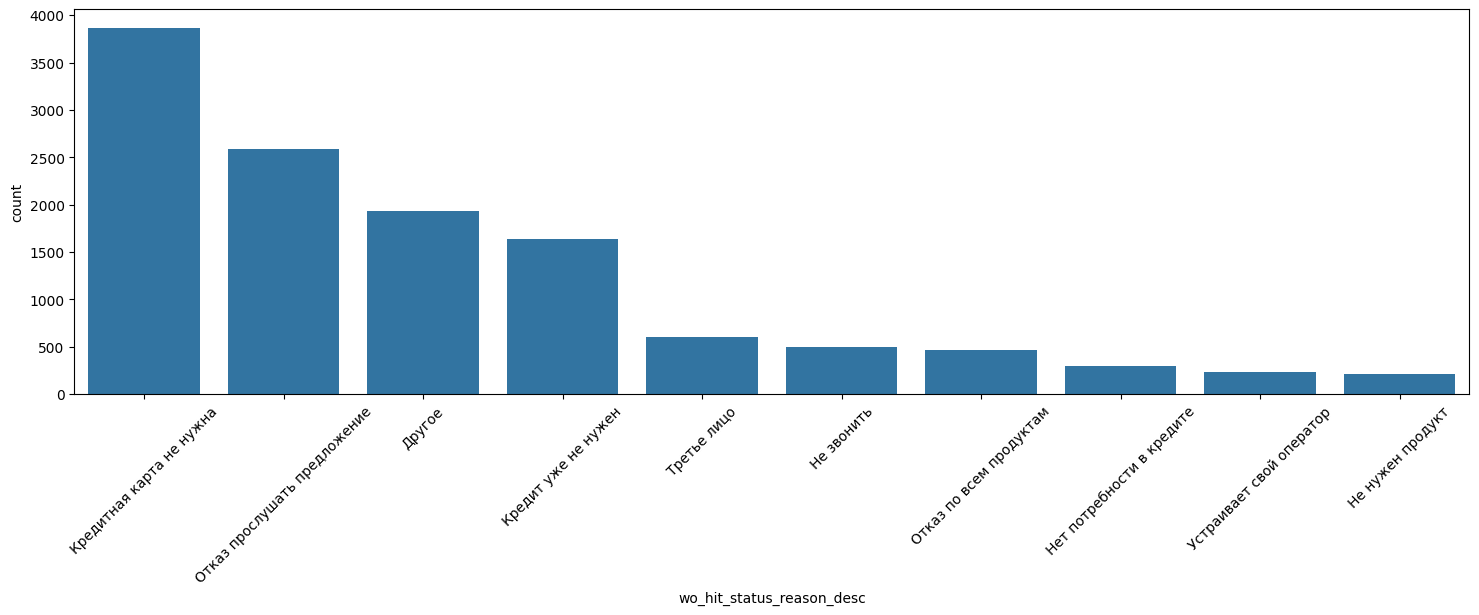

In [91]:
plt.figure(figsize=(18,5))
df_fail = df1[df1['fail_flg']==1]

most_pop_fail_reason = df_fail['wo_hit_status_reason_desc'].value_counts().nlargest(10).index
df_fail_filt = df_fail[df_fail['wo_hit_status_reason_desc'].isin(most_pop_fail_reason)]
sns.countplot(data = df_fail_filt, x = df_fail_filt['wo_hit_status_reason_desc'], order = most_pop_fail_reason)

plt.xticks(rotation = 45);

Наиболее частыми причинами неуспеха звонков являются: «Кредитная карта не нужна», «Отказ прослушать предложение» и «Кредит уже не нужен». Категорию «Другое» исключаем из анализа из-за невозможности интерпретации. <br> <br>

Причина «Отказ прослушать предложение» отражает отсутствие базового интереса клиента, а не реакцию на конкретный продукт. Из-за этого влияние факторов на неё затруднено, и гипотезы по улучшению не поддаются надёжной проверке. <br> <br>

Оставшиеся причины отказа («Кредитная карта не нужна», «Кредит уже не нужен») завязаны на конкретные банковские продукты. Они представляют интерес для анализа, так как позволяют выдвигать чёткие гипотезы: какие условия, сценарии и клиентские характеристики влияют на готовность оформить продукт.

Ранее был проведён анализ факторов, оказывающих статистически значимое влияние на успех звонка. Чтобы оценить причины неуспеха более глубоко, необходимо проверить, как эти же факторы связаны с различными типами отказов. Это поможет сформировать гипотезы по снижению доли неуспешных звонков. <br> <br>

Факторы, оказавшие статистически значимое влияние:<br>
- `gender_cd`
- `region_size`
- `foreign_flg`
- `realty_type`
- `product_cd`
- `hour`
- `functional_cd`
- `segment_cd`
- `emp_age`
- `emp_work_months_count`


Для оценки влияния различных факторов на выбор конкретной причины отказа ("Кредитная карта не нужна", "Кредит уже не нужен") — был применён Cramer’s V, коэффициент связи для категориальных переменных.

Метод основан на расчёте статистики хи-квадрат по таблице сопряжённости между фактором (например, возраст или тип продукта) и бинарной переменной, обозначающей наличие данной причины отказа. Полученное значение Cramér’s V интерпретируется по шкале:

V ≥ 0.40 — сильная связь

V ≥ 0.20 — средняя связь

V ≥ 0.05 — слабая связь

V < 0.05 — очень слабая или отсутствует

Таким образом, мы количественно оценили, насколько каждый фактор ассоциирован с выбором конкретной причины отказа, а не просто с общим успехом звонка.



##### Кредитная карта не нужна

In [92]:
features = [
    'gender_cd', 'region_size', 'foreign_flg', 'realty_type', 'product_cd',
    'hour', 'functional_cd', 'segment_cd', 'emp_age', 'emp_work_months_cnt'
]


df_fail = df1[df1['fail_flg'] == 1].copy()
df_fail['is_credit_card_not_needed'] = (df_fail['wo_hit_status_reason_desc'] == 'Кредитная карта не нужна').astype(int)

def cramers_v(conf_matrix):
    chi2, _, _, _ = chi2_contingency(conf_matrix)
    n = conf_matrix.sum().sum()
    min_dim = min(conf_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

def interpret(v):
    if v >= 0.40:
        return "сильная связь"
    elif v >= 0.2:
        return "средняя связь"
    elif v >= 0.05:
        return "слабая связь"
    else:
        return "очень слабая или отсутствует"


for feature in features:
    contingency = pd.crosstab(df_fail[feature], df_fail['is_credit_card_not_needed'])
    v = cramers_v(contingency)
    print(f"{feature}: Cramer's V = {v:.4f} — {interpret(v)}")

gender_cd: Cramer's V = 0.0362 — очень слабая или отсутствует
region_size: Cramer's V = 0.0373 — очень слабая или отсутствует
foreign_flg: Cramer's V = 0.0326 — очень слабая или отсутствует
realty_type: Cramer's V = 0.0265 — очень слабая или отсутствует
product_cd: Cramer's V = 0.4994 — сильная связь
hour: Cramer's V = 0.0887 — слабая связь
functional_cd: Cramer's V = 0.5100 — сильная связь
segment_cd: Cramer's V = 0.0925 — слабая связь
emp_age: Cramer's V = 0.3010 — средняя связь
emp_work_months_cnt: Cramer's V = 0.1735 — слабая связь


<b>Вывод</b> <br>
Наибольшее влияние на вероятность отказа по причине "Кредитная карта не нужна" оказывают:

Тип продукта (product_cd) — связь очевидна, отказ касается именно кредитной карты.

Функциональное назначение звонка (functional_cd) — отражает цель контакта (например, предложение оформления карты).

Остальные факторы (включая пол, тип недвижимости, регион проживания и т.д.) оказывают слабое или практически отсутствующее влияние на выбор этой причины отказа.

Таким образом, гипотезы по снижению отказов по причине "Кредитная карта не нужна" следует формулировать не в контексте таргетинга конкретных аудиторий, а через пересмотр условий продукта, сценариев скрипта, позиционирования и, возможно, времени контакта.

<b>Ключевые для анализа метрики</b>

Конверсия в успешный звонок по продукту "Кредитные карты"

In [93]:
card_conversion = df1[df1['product_cd'] == 'Credit Cards']['success_flg'].mean()
card_conversion

np.float64(0.07697025452315241)

Доля отказов по причине "Кредитная карта не нужна" среди всех неуспешных звонков по картам

In [94]:
df_cards_fail = df1[(df1['product_cd'] == 'Credit Cards') & (df1['fail_flg'] == 1)]
fail_reason_ratio = (df_cards_fail['wo_hit_status_reason_desc'] == 'Кредитная карта не нужна').mean()
fail_reason_ratio

np.float64(0.42846068660022146)

<b>Гипотеза</b><br>
Если расширить действие льготного периода 120 дней не только на погашение кредитов, но и на любые покупки, то доля отказов с причиной "Кредитная карта не нужна" среди клиентов, получивших предложение, снизится на X% по сравнению с контрольной группой, так как потребительская ценность продукта возрастёт. <br>
<b>Метрика:</b><br><br>
Доля отказов по причине "Кредитная карта не нужна" (wo_hit_status_reason_desc)
<br><br>
<b>Дополнительно:</b> конверсия в успешный звонок (success_flg)
<br><br>
<b>Целевой сегмент:</b><br><br>
<b>Продукт:</b> Credit Cards
<br><br>
<b>Целевая аудитория:</b> Все клиенты, кроме тех, кто ранее уже отказался от кредитки
<br><br>
<b>Критерий успеха:</b><br><br>
Статистически значимое снижение доли отказов с этой причиной минимум на <b>10%</b> (относительно) в тестовой группе.

##### Кредит уже не нужен

In [95]:
features = [
    'gender_cd', 'region_size', 'foreign_flg', 'realty_type', 'product_cd',
    'hour', 'functional_cd', 'segment_cd', 'emp_age', 'emp_work_months_cnt'
]


df_fail = df1[df1['fail_flg'] == 1].copy()
df_fail['is_credit_not_needed'] = (df_fail['wo_hit_status_reason_desc'] == 'Кредит уже не нужен').astype(int)

def cramers_v(conf_matrix):
    chi2, _, _, _ = chi2_contingency(conf_matrix)
    n = conf_matrix.sum().sum()
    min_dim = min(conf_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

def interpret(v):
    if v >= 0.40:
        return "сильная связь"
    elif v >= 0.2:
        return "средняя связь"
    elif v >= 0.05:
        return "слабая связь"
    else:
        return "очень слабая или отсутствует"


for feature in features:
    contingency = pd.crosstab(df_fail[feature], df_fail['is_credit_not_needed'])
    v = cramers_v(contingency)
    print(f"{feature}: Cramer's V = {v:.4f} — {interpret(v)}")

gender_cd: Cramer's V = 0.0129 — очень слабая или отсутствует
region_size: Cramer's V = 0.0284 — очень слабая или отсутствует
foreign_flg: Cramer's V = 0.0186 — очень слабая или отсутствует
realty_type: Cramer's V = 0.0316 — очень слабая или отсутствует
product_cd: Cramer's V = 0.3358 — средняя связь
hour: Cramer's V = 0.0422 — очень слабая или отсутствует
functional_cd: Cramer's V = 0.2704 — средняя связь
segment_cd: Cramer's V = 0.0718 — слабая связь
emp_age: Cramer's V = 0.1904 — слабая связь
emp_work_months_cnt: Cramer's V = 0.1068 — слабая связь


<b>Вывод</b> <br>



Средняя связь:
Тип продукта (product_cd) — как и ожидалось, наибольшее влияние оказывает сам продукт, по которому совершается звонок. Отказ «Кредит уже не нужен» очевидно связан с кредитными продуктами.

Функциональное назначение звонка (functional_cd) — указывает на цель контакта, например, предложение оформить кредит, что логично влияет на отказ от него.

Слабая связь:

Возраст клиента (emp_age) — возможна разница в восприятии кредитов у разных возрастных групп.

Сегмент клиента (segment_cd) и стаж работы (emp_work_months_cnt) — факторы оказывают некоторое влияние, но оно умеренное.

Очень слабая или отсутствующая связь:

Пол (gender_cd), размер региона (region_size), иностранный статус (foreign_flg), тип недвижимости (realty_type) и время звонка (hour) — факторы почти не влияют на выбор этой причины отказа.

<b>Ключевые для анализа метрики</b>

Конверсия в успешный звонок по продукту "Потребительский кредит"

In [96]:
card_conversion = df1[df1['product_cd'] == 'Cash Loan']['success_flg'].mean()
card_conversion

np.float64(0.09795763993948563)

Доля отказов по причине "Кредит уже не нужен" среди всех неуспешных звонков по картам

In [97]:
df_cards_fail = df1[(df1['product_cd'] == 'Cash Loan') & (df1['fail_flg'] == 1)]
fail_reason_ratio = (df_cards_fail['wo_hit_status_reason_desc'] == 'Кредит уже не нужен').mean()
fail_reason_ratio

np.float64(0.3169811320754717)

<b>Гипотеза</b> <br>
Причина отказа «Кредит уже не нужен» часто маскирует наличие текущего кредита. Если в таких случаях предлагать альтернативу — например, рефинансирование или консолидацию долгов, то доля отказов по этой причине снизится.

<b>Метрики:</b>
Основная метрика:
— Доля отказов по причине «Кредит уже не нужен» среди клиентов с действующими кредитами.


<b>Дополнительно:</b> конверсия в успешный звонок (success_flg)

<b>Целевая аудитория:</b>
— Клиенты, которым предлагается продукт Cash Loan
— Имеют действующие кредиты в Т-Банке или, по внешним источникам, в других банках
<b>Критерий успеха:</b><br><br>
Статистически значимое снижение доли отказов с этой причиной минимум на <b>10%</b> (относительно) в тестовой группе.

##### Приоритизация гипотез

**Анализ гипотез с помощью ICE-модели**

Для оценки и приоритизации гипотез мы используем ICE-фреймворк — простой, но эффективный способ определить, какие идеи стоит тестировать в первую очередь. Каждая гипотеза оценивается по трём критериям:

- **Impact (Влияние)** — насколько сильно изменение может повлиять на ключевые метрики.
- **Confidence (Уверенность)** — насколько мы уверены, что гипотеза даст ожидаемый результат.
- **Ease (Лёгкость внедрения)** — насколько просто и быстро реализовать изменения.

Каждому критерию присваивается балл по шкале от 1 до 10. Среднее значение используется как итоговая оценка ICE. Чем выше итоговый балл, тем выше приоритет гипотезы для тестирования.

<b>ICE-анализ гипотезы: расширение льготного периода до 120 дней на все покупки</b>

| Критерий     | Оценка | Обоснование |
|--------------|--------|-------------|
| **Impact**   | **8/10** | Повышение ценности продукта для клиента. Потенциально снижает долю отказов с причиной "Кредитная карта не нужна" и увеличивает общую конверсию. |
| **Confidence** | **7/10** | Обосновано текущими метриками: 42.8% отказов по этой причине. Гипотеза логична и подтверждается EDA, но влияние других факторов не исключено. |
| **Ease**     | **6/10** | Требует изменения оффера и процессов коммуникации. Не требует сложных технических доработок, но согласования могут затянуться. |

**Итоговый ICE Score**: **7.0**


**ICE-анализ гипотезы: Альтернатива клиентам с действующими кредитами**

| Критерий        | Оценка | Обоснование |
|-----------------|--------|-------------|
| **Impact**      | 7/10   | Отказ по причине "Кредит уже не нужен" встречается в ~31.7% случаев для продукта Cash Loan. Снижение этой доли способно заметно повлиять на общую эффективность звонков. |
| **Confidence**  | 6/10   | Предпосылка логична (у клиента уже есть кредит), однако достоверных внешних источников о долгах может не хватать. Требуется A/B-проверка. |
| **Ease**        | 5/10   | Необходима интеграция с кредитными источниками, а также настройка предложения по рефинансированию. Умеренные затраты. |

**Итоговый ICE Score:** (7 + 6 + 5) / 3 = **6.0**


По результатам ICE анализа удалось выяснить, что гипотеза, связанная с расширением льготного периода и направленная на уменьшение доли отказов по причине "Кредитная карта не нужна", оказалось наиболее значимой для бизнеса

## 6. Выводы

Был проведен исследовательский анализ датасета с информацией о звонках клиента. <br>
В ходе анализа удалось составить портрет типичного клиента по основным признакам: 
- возраст 34-45 лет
- пол: мужской
- Проживающий в городе, в собственной квартире

**Оформление кредита** является самой востребованной услугой  <br> <br>
**Предодобрение заявки** - самая частая причина, по которой совершается звонок<br><br>

В ходе анализа факторов влияющих на успех звонка наиболее значимыми оказались следующие:
- gender_cd
- region_size
- foreign_flg
- relaty_type
- product_cd
- hour
- functional_cd
- segment_cd
- emp_age
- emp_work_months_count

Далее были выделены ключевые причины отказов, влияющие на эффективность продаж. Ими оказались: "Кредитная карта не нужна" и "Кредит уже не нужен". В ходе сегментного анализа не удалось выявить значимых признаков, влиябщих на данные причины, поэтому гипотезы по улучшению показателей, связанных с этими причинами были сформированы с упором на сам продукт, а не на его аудиторию. <br><br>
Были сформулированы две гипотезы: <br>
<b>Гипотеза 1</b><br>
Если расширить действие льготного периода 120 дней не только на погашение кредитов, но и на любые покупки, то доля отказов с причиной "Кредитная карта не нужна" среди клиентов, получивших предложение, снизится на X% по сравнению с контрольной группой, так как потребительская ценность продукта возрастёт. Ожидается, что конверсия отказов по данной причине уменьшится приблизительно на 10% (в относительных величинах)<br>
<b>Гипотеза 2</b> <br>
Причина отказа «Кредит уже не нужен» часто маскирует наличие текущего кредита. Если в таких случаях предлагать альтернативу — например, рефинансирование или консолидацию долгов, то доля отказов по этой причине снизится. Ожидается, что конверсия отказов по данной причине уменьшится приблизительно на 10% (в относительных величинах)<br><br>
В ходе проведения приоритизации гипотез с помощью ICE анализа удалось установить что 1-ая гипотеза, связанная с кредитными картами наиболее значима для бизнеса